<a href="https://colab.research.google.com/github/josevabo/BootCamp-DS-Alura/blob/main/Modulo_3/Bootcamp_DS_Modulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip install -U scikit-learn
# import sklearn
# sklearn.__version__

# Aula 1 - Entendendo a série temporal
---
* Curvas exponenciais
* Escalas logaritmicas
* Taxas de crescimento com ```.diff()```
* Média móvel com ```.rolling(window=7).mean()```

##Vídeo 1: Coleta de dados e primeiras análises

In [ ]:
import pandas as pd

In [ ]:
url = 'https://github.com/josevabo/BootCamp-DS-Alura/raw/main/dados/dados_covid_sp.zip'
dados = pd.read_csv(url, sep=';')
dados

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
0             Adamantina      3500105   25  ...  -21,6820  -51,0737              9
1                 Adolfo      3500204   25  ...  -21,2325  -49,6451              9
2                  Aguaí      3500303   25  ...  -22,0572  -46,9735              9
3         Águas da Prata      3500402   25  ...  -21,9319  -46,7176              9
4       Águas de Lindóia      3500501   25  ...  -22,4733  -46,6314              9
...                  ...          ...  ...  ...       ...       ...            ...
286173          Ignorado      9999999    8  ...    0,0000    0,0000             18
286174          Ignorado      9999999    9  ...    0,0000    0,0000             19
286175          Ignorado      9999999   10  ...    0,0000    0,0000             19
286176          Ignorado      9999999   11  ...    0,0000    0,0000             19
286177          Ignorado      9999999   12  ...    0,0000    0,0000             19

[286178 rows x 26 columns]

In [ ]:
dados['datahora'] = pd.to_datetime(dados['datahora'], format='%Y-%m-%d')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [ ]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

In [ ]:
import seaborn as sns

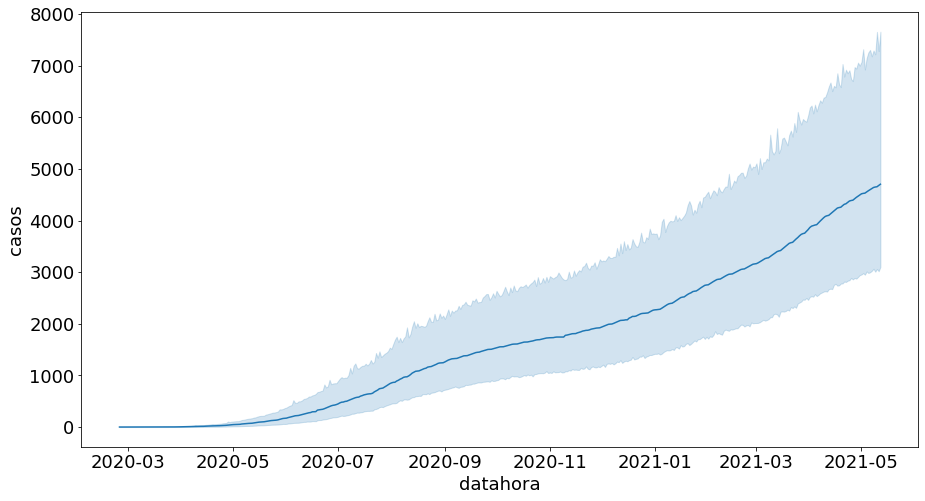

In [ ]:
sns.lineplot(x='datahora', y='casos', data=dados)

###Curvas exponenciais e escalas logaritmicas x escalas lineares
Montando uma curva exponencial

Será que a curva de casos acima é exponencial?

$$ e^x $$

In [ ]:
import numpy as np

In [ ]:
eixo_x = np.linspace(-2,2,100)

In [ ]:
y_exp = np.exp(eixo_x)

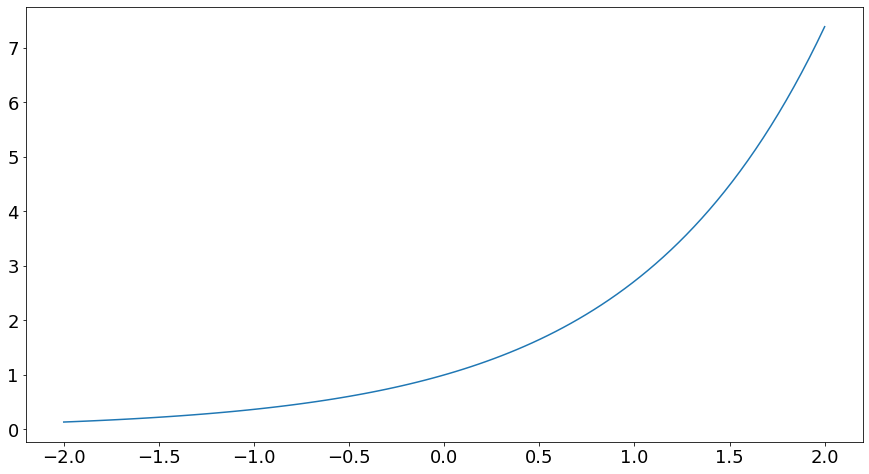

In [ ]:
sns.lineplot(x = eixo_x, y = y_exp)

As curvas exponenciais variam de acordo com logaritmos.

**Quando imprimimos numa escala logaritmica, a curva exponencial se mostra como uma reta crescente, como no gráfico abaixo.**

$$ log_2 2 = 1 $$
$$ log_2 2^x = x $$
$$ log_e e^x = x $$

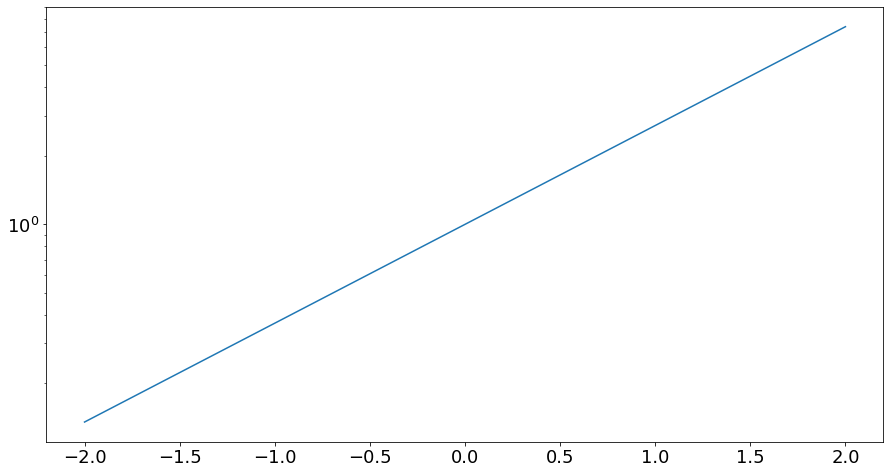

In [ ]:
sns.lineplot(x = eixo_x, y = y_exp)
plt.yscale('log')

In [ ]:
dados_sp = dados.query('nome_munic == "São Paulo"')

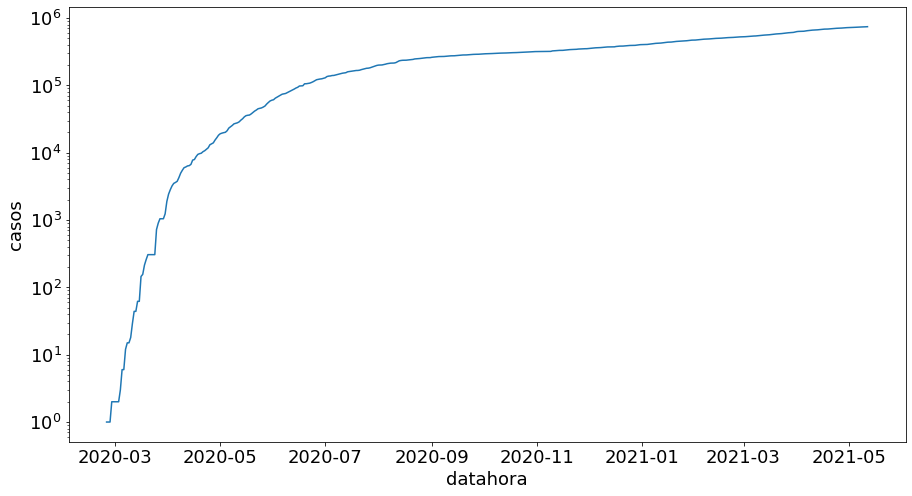

In [ ]:
sns.lineplot(x='datahora', y='casos', data=dados_sp)
plt.yscale('log')

Na curva acima podemos ver que em escala logaritmica, os casos em São Paulo apresentaram 4 padrões de retas diferentes

##Desafio 1: Filtrar a base com  alguma outra função
---
```dados[dados['nome_munic'] == "Aparecida"]```

In [ ]:
dados[dados['nome_munic'] == "Aparecida"]

nome_munic  codigo_ibge  dia  ...  latitude longitude  semana_epidem
27      Aparecida      3502507   25  ...  -22,8495  -45,2325              9
672     Aparecida      3502507   26  ...  -22,8495  -45,2325              9
1317    Aparecida      3502507   27  ...  -22,8495  -45,2325              9
1962    Aparecida      3502507   28  ...  -22,8495  -45,2325              9
2607    Aparecida      3502507   29  ...  -22,8495  -45,2325              9
...           ...          ...  ...  ...       ...       ...            ...
282537  Aparecida      3502507    8  ...  -22,8495  -45,2325             18
283182  Aparecida      3502507    9  ...  -22,8495  -45,2325             19
283827  Aparecida      3502507   10  ...  -22,8495  -45,2325             19
284472  Aparecida      3502507   11  ...  -22,8495  -45,2325             19
285117  Aparecida      3502507   12  ...  -22,8495  -45,2325             19

[443 rows x 26 columns]

##Desafio 2: Escolher outro município pra fazer a análise
---
Município selecionado: Aparecida

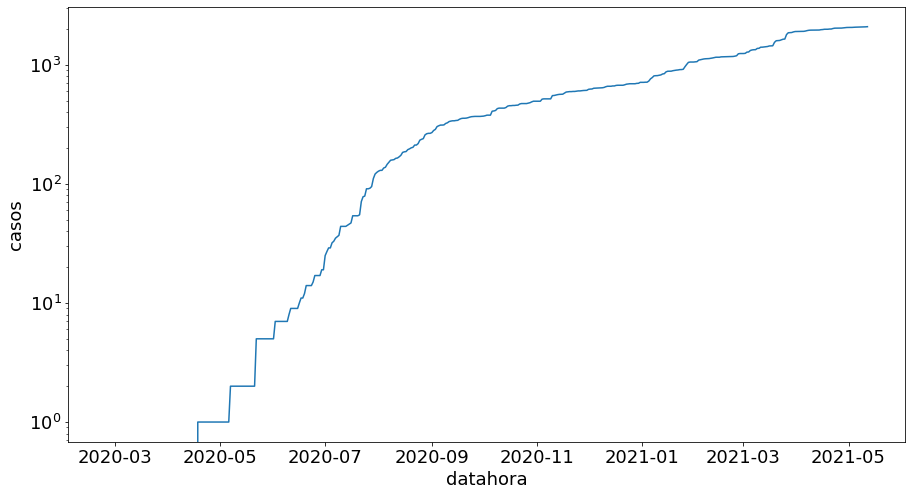

In [ ]:
dados_ap = dados.query('nome_munic == "Aparecida"')
sns.lineplot(x='datahora', y='casos', data=dados_ap)
plt.yscale('log')

##Vídeo: taxa de crescimento e média móvel
---
Exploração da coluna casos_novos

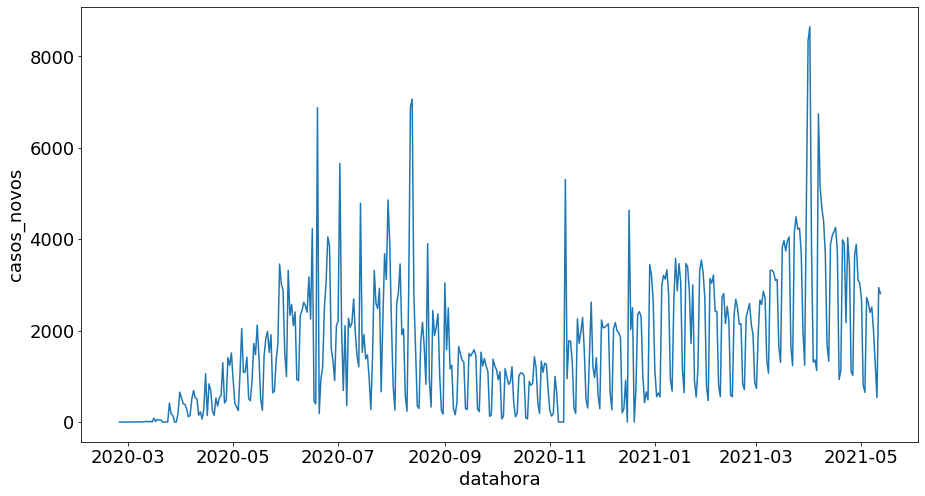

In [ ]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)

<h1 style='border-bottom: 1px solid;'>Uso do diferencial para analisar taxa de crescimento</h1>

In [ ]:
dados_exemplo = pd.DataFrame(np.linspace(1,10,10))
dados_exemplo.head()

0
0  1.0
1  2.0
2  3.0
3  4.0
4  5.0

In [ ]:
dados_exemplo['diferenciado'] = dados_exemplo.diff()
dados_exemplo.head()

0  diferenciado
0  1.0           NaN
1  2.0           1.0
2  3.0           1.0
3  4.0           1.0
4  5.0           1.0

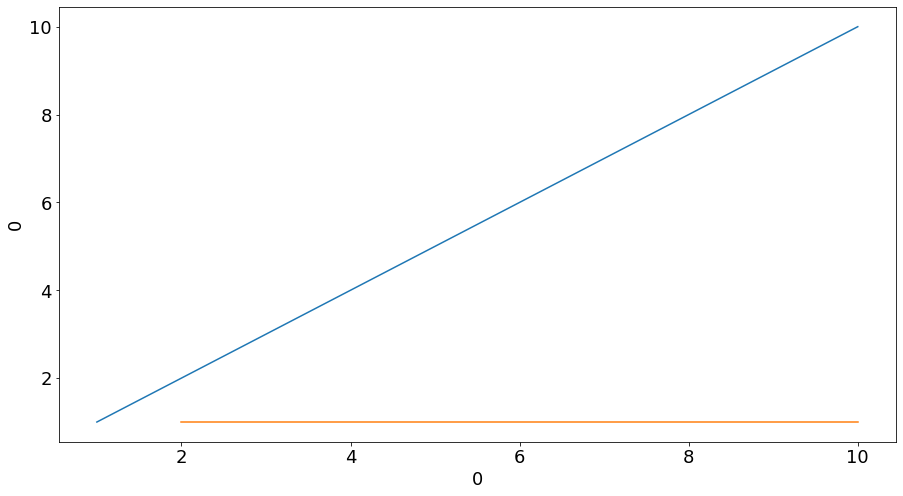

In [ ]:
sns.lineplot(x=0, y=0, data=dados_exemplo)
sns.lineplot(x=0, y='diferenciado', data=dados_exemplo)

<h3> Acima vemos a reta em azul e sua taxa de crescimento em laranja obtida através de df.diff() </h3>
$$ y = ax + b $$

Criação das taxas de crescimento de casos e da taxa para óbitos

In [ ]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


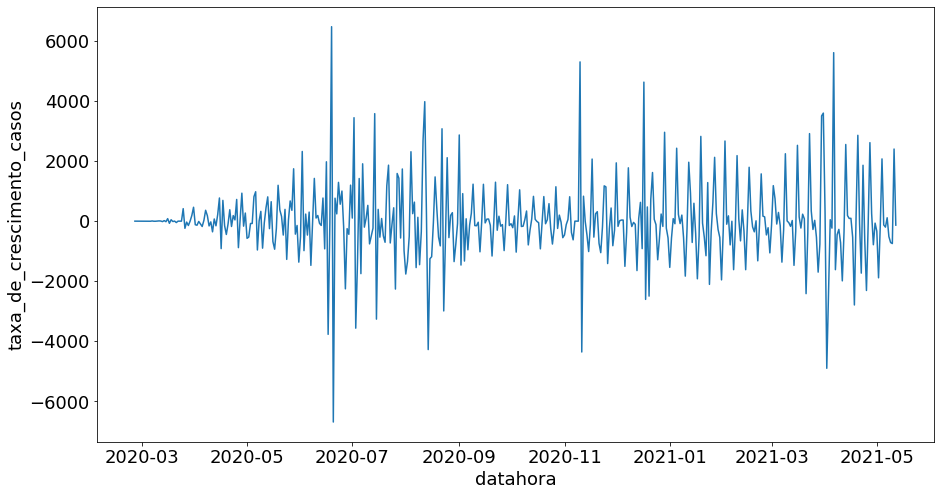

In [ ]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_casos', data=dados_sp)

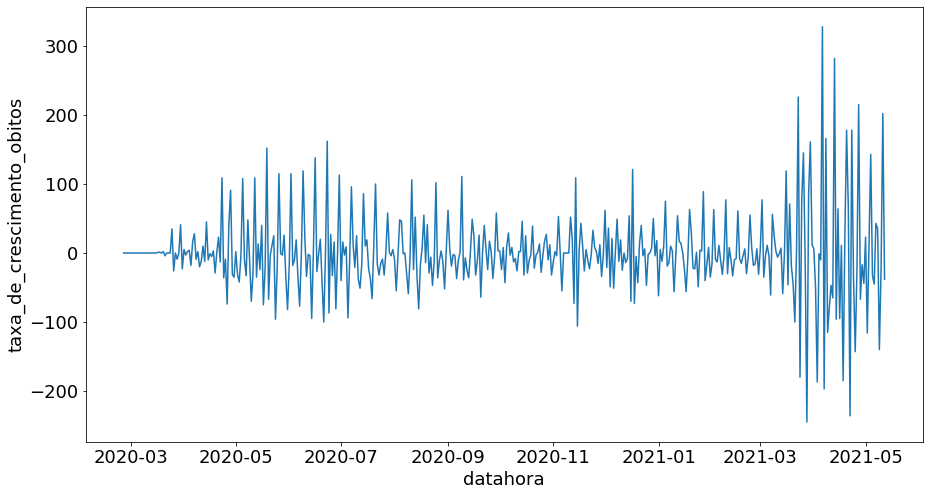

In [ ]:
sns.lineplot(x='datahora', y='taxa_de_crescimento_obitos', data=dados_sp)

Text(0, 0.5, 'Taxa de crescimento de óbitos')

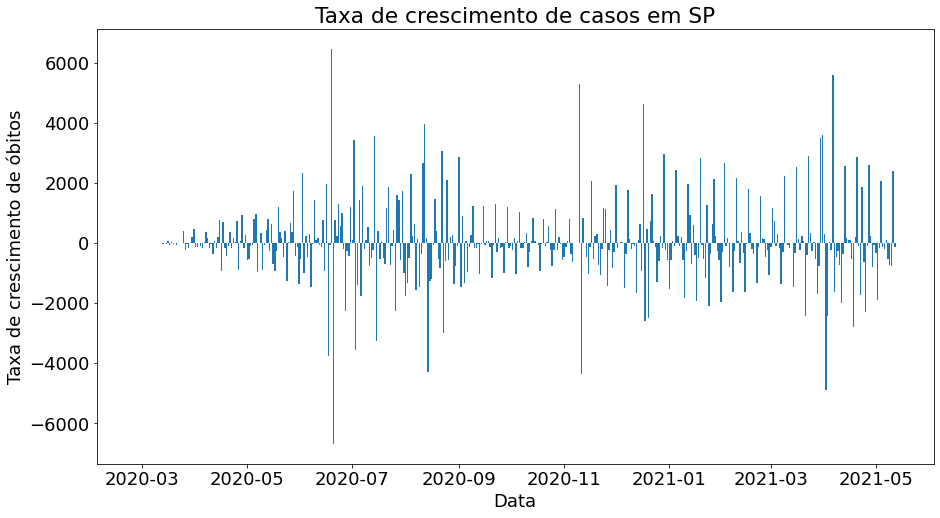

In [ ]:
import matplotlib.pyplot as plt
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])
plt.title('Taxa de crescimento de casos em SP')
plt.xlabel('Data')
plt.ylabel('Taxa de crescimento de óbitos')

<h3>Estamos vendo 2020 e 2021 juntos, por isso ficam muitos dados condensados na visualização</h3>
<h3>Para resolver isso vamos separar os anos</h3>

In [ ]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
dados_2021 = dados_sp.query('ano==2021')
dados_2021.head()

nome_munic  codigo_ibge  ...  taxa_de_crescimento_obitos   ano
201157  São Paulo      3550308  ...                       -62.0  2021
201802  São Paulo      3550308  ...                         5.0  2021
202447  São Paulo      3550308  ...                       -12.0  2021
203092  São Paulo      3550308  ...                         9.0  2021
203737  São Paulo      3550308  ...                        75.0  2021

[5 rows x 29 columns]

(array([737791., 737812., 737822., 737843., 737850., 737871., 737881.,
        737902., 737911.]), <a list of 9 Text major ticklabel objects>)

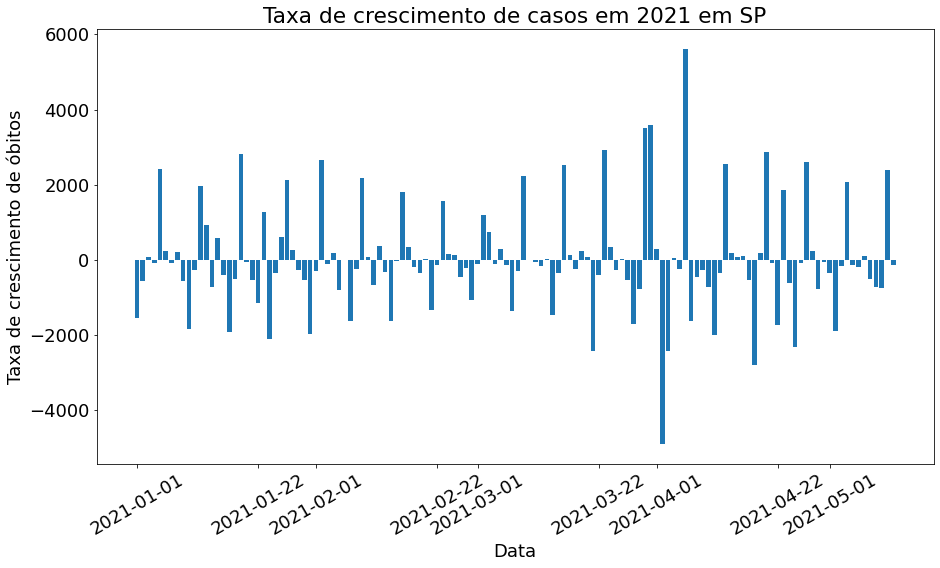

In [ ]:
plt.bar(dados_2021['datahora'], dados_2021['taxa_de_crescimento_casos'])
plt.title('Taxa de crescimento de casos em 2021 em SP')
plt.xlabel('Data')
plt.ylabel('Taxa de crescimento de óbitos')
plt.xticks(rotation = 30)

###Análise da média móvel
---
Uso do ```dados_sp['casos_novos'].rolling(window=7, center=False).mean()``` para calcular média móvel de 7 dias

**O parametro ```center=False``` define que o ponto no gráfico não será representado no centro da janela (window) de 7 dias** que a gente definiu. Dessa forma a média calculada para o periodo do dia 10 ao dia 16 será apresentada no eixo x do gráfico no dia 16 e não no centro entre 10 e 16, por exemplo.

In [ ]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


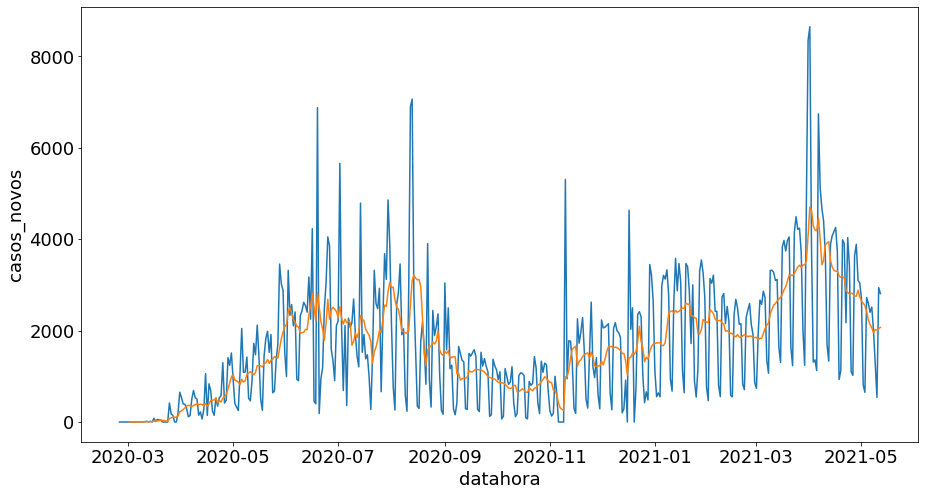

In [ ]:
sns.lineplot(x='datahora', y='casos_novos', data=dados_sp)
sns.lineplot(x='datahora', y='media_movel_casos', data=dados_sp)

A tendência mostrada pela média móvel deixa mais claro o comportamento da evolução dos casos para análise

##Desafio: eliminar os warnings que aparecem em algumas células

In [ ]:
##MUITO Fácil!!
import warnings

warnings.filterwarnings('ignore')

##Desafio: Comparar se picos de casos novos coincide com os de novos casos

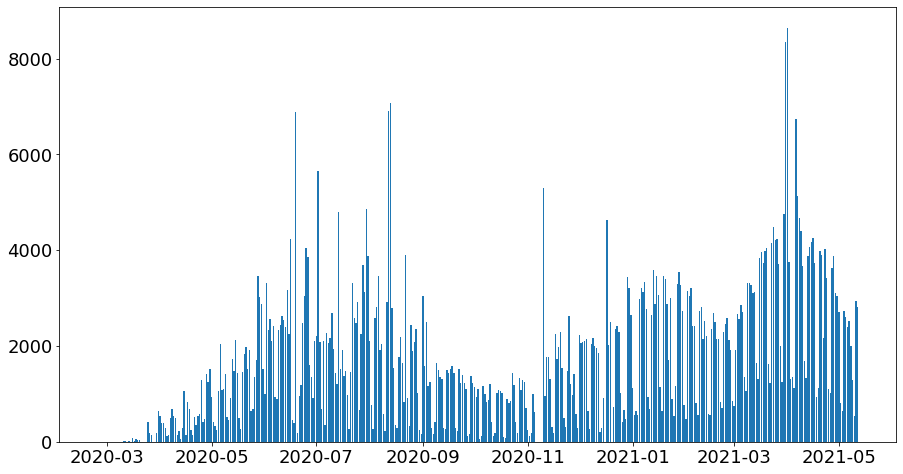

<BarContainer object of 443 artists>

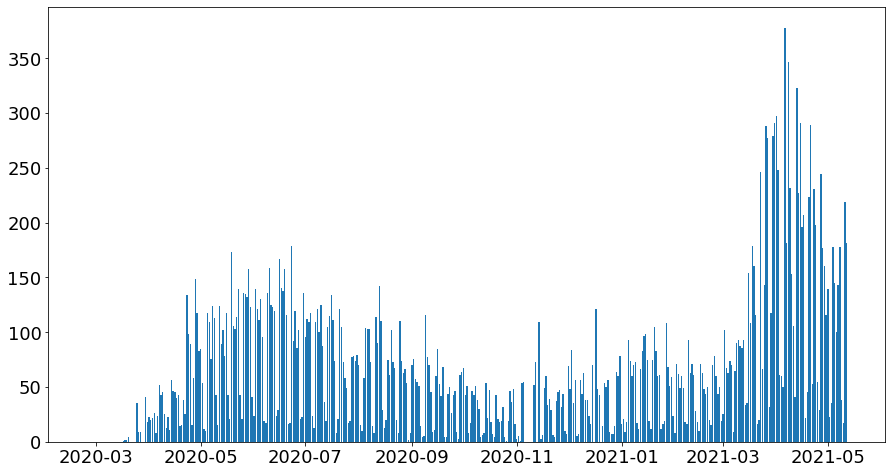

In [ ]:
plt.bar(dados_sp['datahora'], dados_sp['casos_novos'])
plt.show()
plt.bar(dados_sp['datahora'], dados_sp['obitos_novos'])

##Desafio: Melhorar todos os gráficos da aula: colocar títulos, labels [ATUALIZEI TUDO]

##Desafio: Gerar gráfico da média móvel de óbitos. Mudar os gráficos de casos de linhas para barras

Text(0.5, 1.0, 'Registro de óbitos e média móvel de 7 dias')

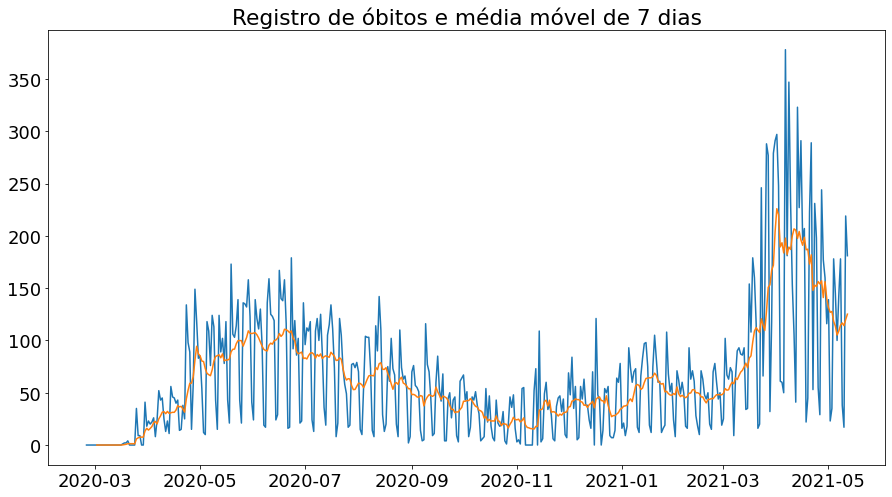

In [ ]:
plt.plot(dados_sp['datahora'], dados_sp['obitos_novos'])
plt.plot(dados_sp['datahora'], dados_sp['obitos_novos'].rolling(window=7, center=False).mean())
plt.title('Registro de óbitos e média móvel de 7 dias')

##Video 3 - Correlação e função de autocorrelação
[Artigo da alura sobre autocorrelação](https://www.alura.com.br/artigos/funcao-de-autocorrelacao)

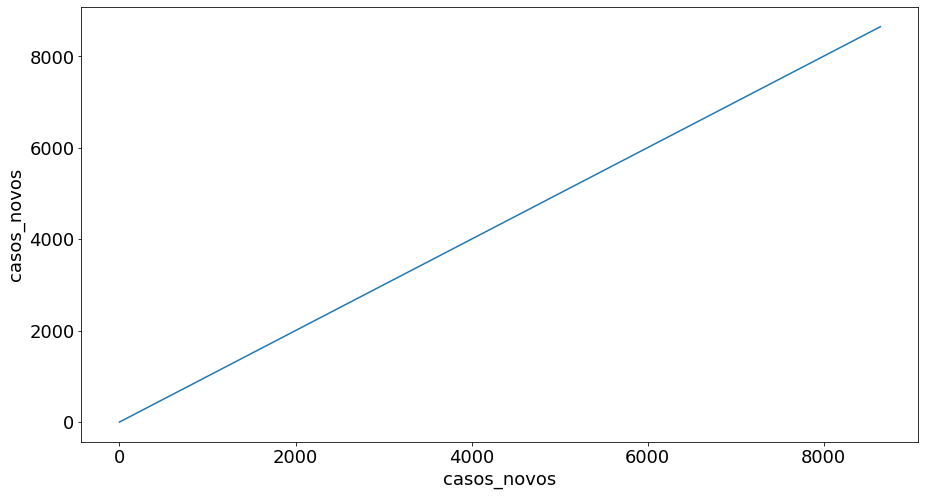

In [ ]:
sns.lineplot(x='casos_novos', y='casos_novos', data=dados_sp)

Exemplo de uma correlação positiva e perfeita (e óbvia, pois é a correlação de uma séria com ela mesma)

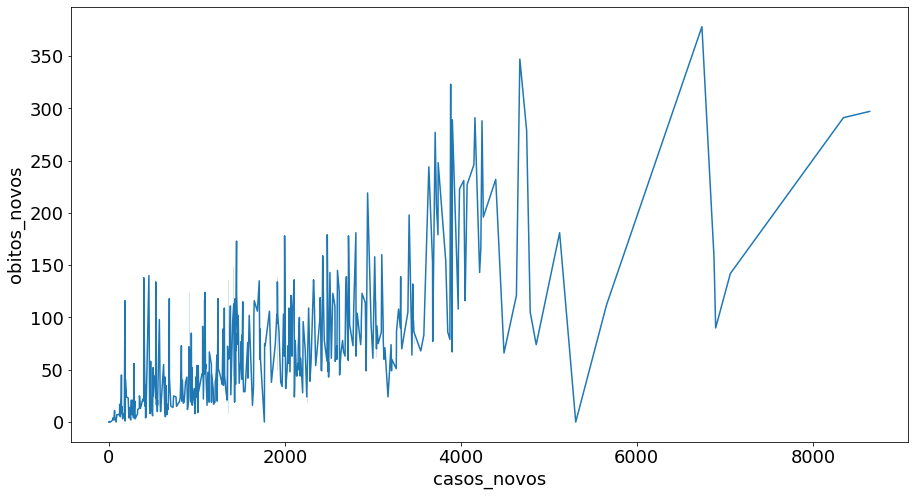

In [ ]:
sns.lineplot(y='obitos_novos', x='casos_novos', data=dados_sp)

Correlação entre casos novos e obitos novos

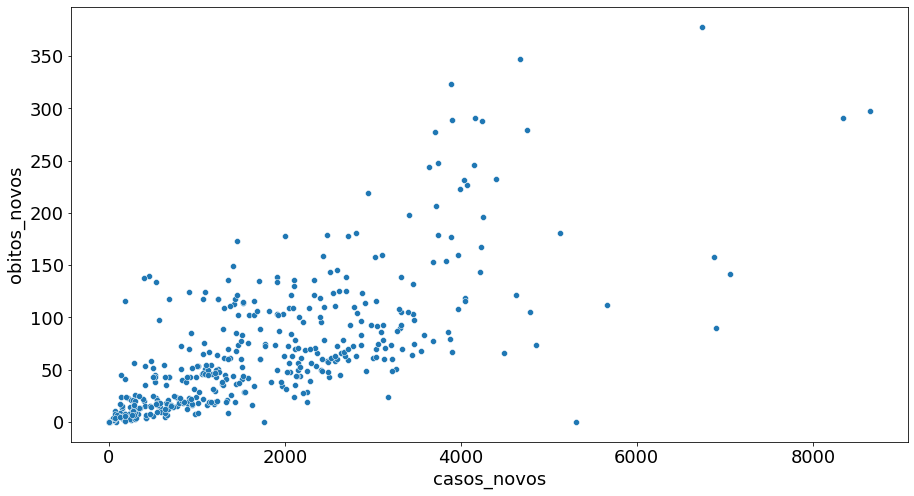

In [ ]:
sns.scatterplot(y='obitos_novos', x='casos_novos', data=dados_sp)

<h3>Imprimi a correlação entre casos e óbitos com scatterplot e percebi que fica melhor do que linhas, pois tira a impressão de continuidade nos dados</h3>

###Observando sazonalidade semanal nos meses separadamente

In [ ]:
dados_202101 = dados_sp.query('mes==1 & ano==2021')
dados_202102 = dados_sp.query('mes==2 & ano==2021')

**O ```plt.show()``` entre chamadas de ```plt.plot()``` garante a geração de gráficos separados**

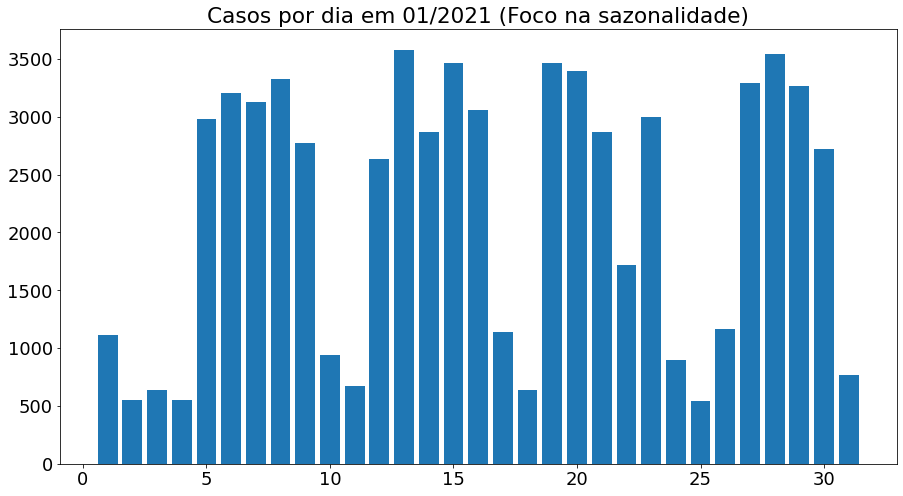

Text(0.5, 1.0, 'Casos por dia em 02/2021 (Foco na sazonalidade)')

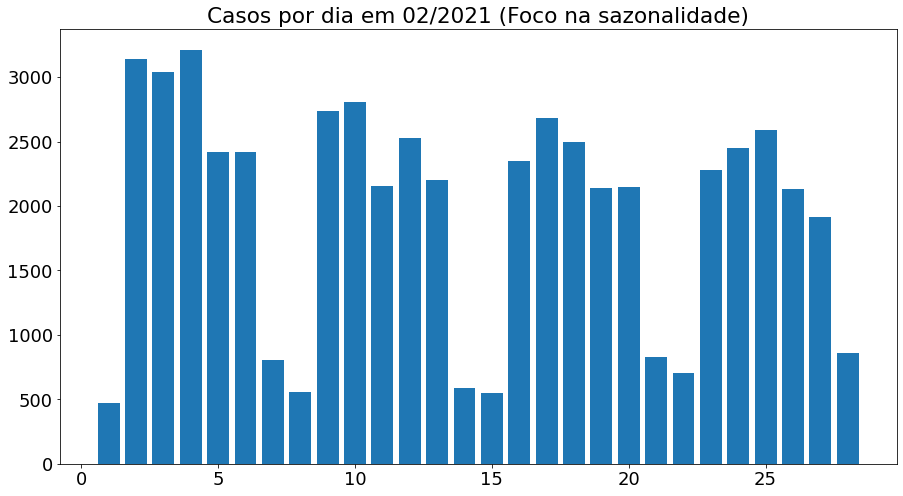

In [ ]:
plt.bar(np.linspace(1,31,31), dados_202101['casos_novos'])
plt.title('Casos por dia em 01/2021 (Foco na sazonalidade)')
plt.show()
plt.bar(np.linspace(1,28,28), dados_202102['casos_novos'])
plt.title('Casos por dia em 02/2021 (Foco na sazonalidade)')

**Podemos perceber acima sazonalidade semanal nos dados de casos em SP nos meses de Jan2021 e Fev2021.**

Percebemos que os primeiros dias de janeiro apresentam um baixo volume de dados. Provavelmente pelo feriado de ano novo.

O mesmo ocorre em 25 de janeiro, pois tem feriado em São paulo

**Neste caso a sazonalidade é facil de enxergar, mas nem sempre será visível a olho nu assim**

###Função de autocorrelação para descobrir sazonalidades não visíveis
---
**autocorrelação trata de dependência temporal na série**

> Autocorrelation plots are a commonly used tool for checking randomness in a data set. This randomness is ascertained by computing autocorrelation for data values at varying time lags. It shows the properties of a type of data known as a time series. (https://www.geeksforgeeks.org/python-pandas-plotting-the-autocorrelation-plot/)

**O gráfico de auto correlação apresenta a aleatoriedade de dados em uma série considerando time lags diferentes (eixo x). A aleatoriedade existe quanto mais próximo de 0**


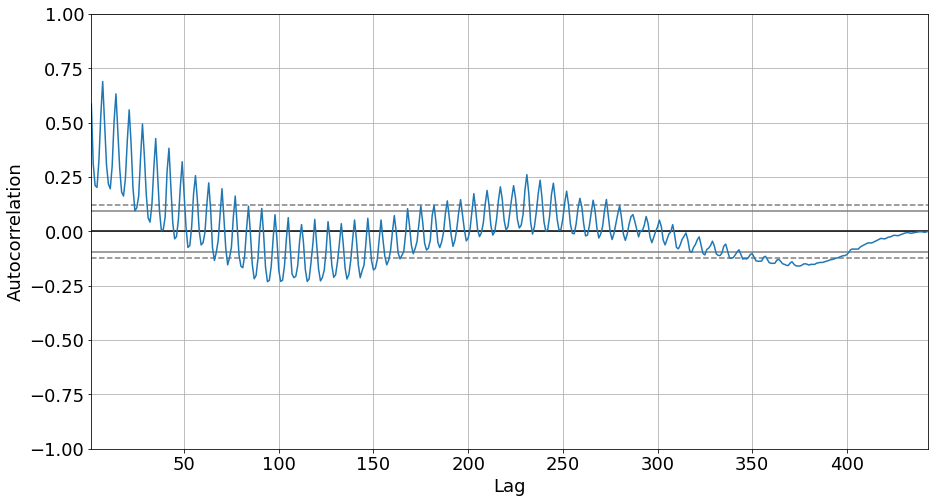

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(dados_sp['casos_novos'])

* Na autocorrelação acima podemos concluir que a correlação mais alta está na comparação de números de casos mais próximos de si na série.
* Após o Lag de 50 (acredito que 50 dias de distância entre os dados) zeramos a correlação e uma tendência negativa (correlação inversa) começa daí em diante.
* Ao final do gráfico a autocorrelação tende a zero, ou seja, na maior distância de tempo possível (comparar início da pandemia e períodos finais dos dados coletados) os dados já não se conversam muito. **Ou seja, uma conclusão interessante de que o início da pandemia não tem comportamento nada parecido com o atual**

In [ ]:
dados_sp.shape

(443, 31)

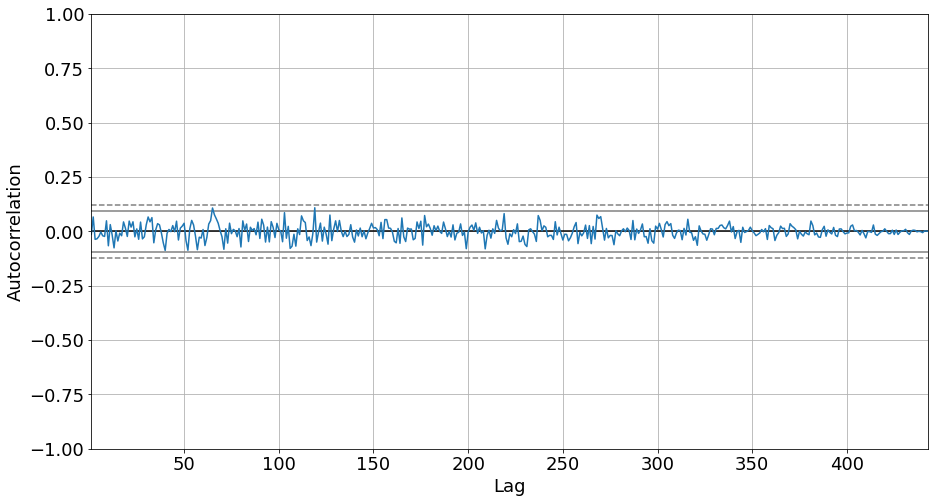

In [ ]:
aleatorio = np.random.rand(443)
autocorrelation_plot(aleatorio)

Podemos ver que dados aleatórios geram um gráfico de autocorrelação próximos de 0, pois mesmo variando a distância de tempo entre as comparações não é achada correlação alguma, pois os dados são aleatórios

##DESAFIO: Mover óbitos duas/uma/tres semanas para frente ou para trás e ver se melhora a correlação com o numero de casos

Text(0.5, 1.0, 'Comparativo de ocorrência de novos casos e óbitos após 7 dias')

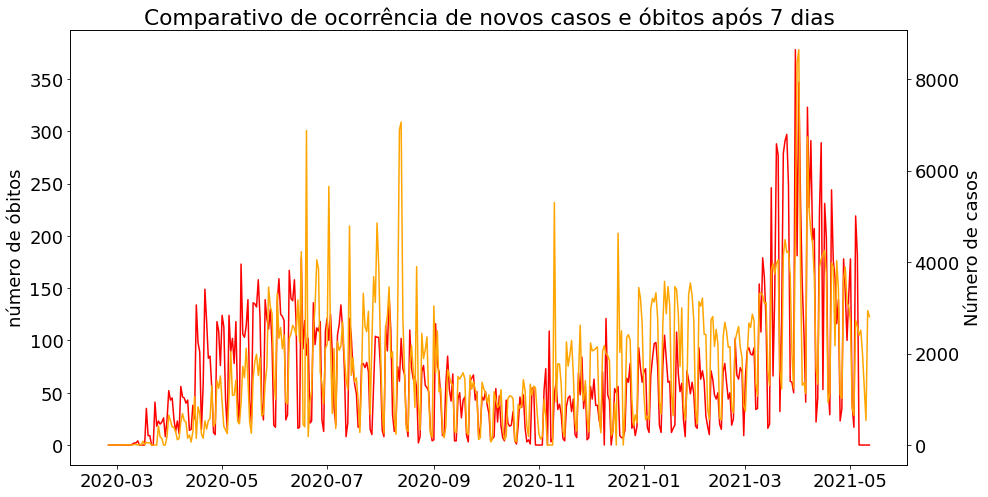

In [ ]:
dados_sp['obitos_7d'] = dados_sp['obitos_novos'].shift(periods=-7, fill_value=0)

fig, ax1 = plt.subplots()
ax1.plot(dados_sp['datahora'], dados_sp['obitos_7d'], color='red')
ax1.set_ylabel('número de óbitos')
ax2 = ax1.twinx()
ax2.plot(dados_sp['datahora'], dados_sp['casos_novos'], color='orange')
ax2.set_ylabel('Número de casos')
plt.title('Comparativo de ocorrência de novos casos e óbitos após 7 dias')

Text(0.5, 1.0, 'Comparativo de ocorrência de novos casos e óbitos após 14 dias')

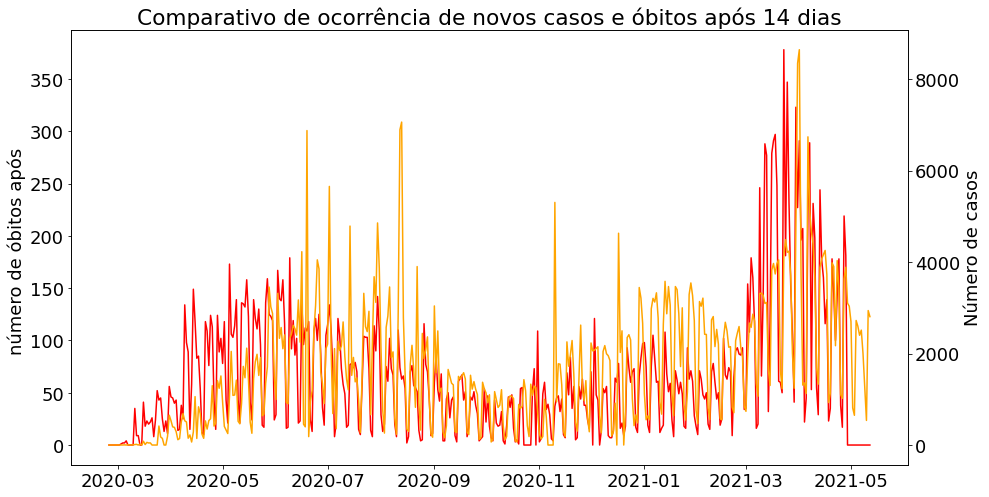

In [ ]:
dados_sp['obitos_14d'] = dados_sp['obitos_novos'].shift(periods=-14, fill_value=0)

fig, ax1 = plt.subplots()
ax1.plot(dados_sp['datahora'], dados_sp['obitos_14d'], color='red')
ax1.set_ylabel('número de óbitos após ')
ax2 = ax1.twinx()
ax2.plot(dados_sp['datahora'], dados_sp['casos_novos'], color='orange')
ax2.set_ylabel('Número de casos')
plt.title('Comparativo de ocorrência de novos casos e óbitos após 14 dias')

Text(0.5, 1.0, 'Comparativo de ocorrência de novos casos e óbitos 7 dias antes')

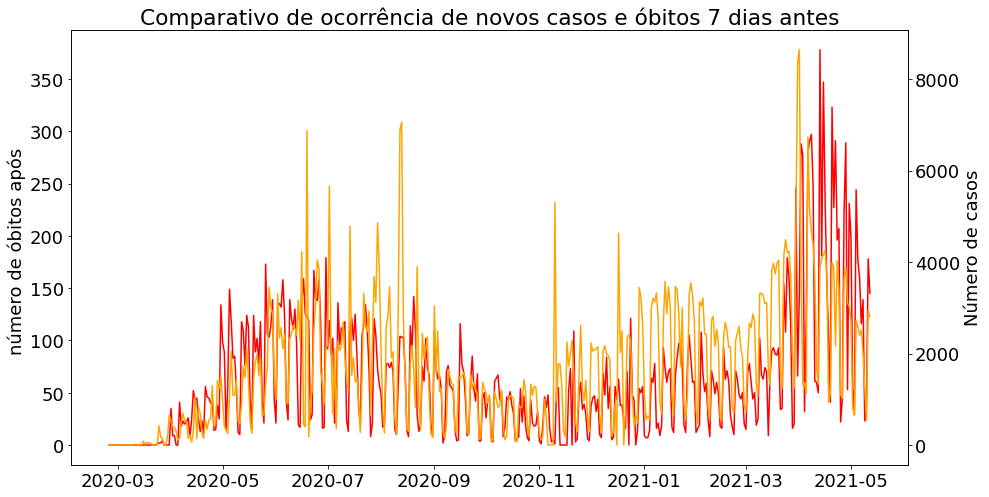

In [ ]:
dados_sp['obitos_7d_antes'] = dados_sp['obitos_novos'].shift(periods=7, fill_value=0)

fig, ax1 = plt.subplots()
ax1.plot(dados_sp['datahora'], dados_sp['obitos_7d_antes'], color='red')
ax1.set_ylabel('número de óbitos após ')
ax2 = ax1.twinx()
ax2.plot(dados_sp['datahora'], dados_sp['casos_novos'], color='orange')
ax2.set_ylabel('Número de casos')
plt.title('Comparativo de ocorrência de novos casos e óbitos 7 dias antes')

##DESAFIO: Calcular correlação cruzada entre óbitos e casos (dica olhar na statsmodels)

Criar função que calcula o .corr() para cada shift() possível entre as duas séries

##DESAFIO: Estudar outros municípios

#Aula 2 - Primeiras Previsões (Facebook Prophet)
---
O Prophet é uma lib criada pela equipe de pesquisa do Facebook. É muito útil para previsões com séries temporais.

**No colab para importar usamos ```from fbprophet import Prophet```, mas em outras IDEs pode ser mais simples, apenas ```import Prophet```**

O Prophet a principio exige um DataFrame com **colunas ['ds', 'y']**

O que ele tentará fazer é encontrar uma reta que se ajuste aos dados.
$$ y = a(ds) + b $$

* separação dos dados de treino e teste
* Criação de um df com campos ds e y
* Treino do modelo com ```modelo.fit(df)```
* Teste do modelo com o ```modelo.predict(dataframefuturo)```
* plotagem completa incluindo sazonalidades com ```modelo.plot(previsao)```

In [ ]:
from fbprophet import Prophet

* **Criando modelo nos moldes que o Prophet exige**
* Instanciando o modelo
* treinando o modelo (modelo.fit())
* Criamos df com datas futuras
* Usamos ```modelo.predict(datasfuturas)``` para prever dados nas novas datas a partir do que foi treinado no ```modelo.fit(df)```

In [ ]:
df = pd.DataFrame()
df['ds'] = dados_sp['datahora']
df['y'] = dados_sp['casos_novos']

In [ ]:
modelo = Prophet()

In [ ]:
modelo.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


###Criando DataFrame com datas futuras para prever em cima delas
---
A criação de uma lista de datas para criar predição em cima:
```modelo.make_future_dataframe(periods=30)```



In [ ]:
dataframefuturo = modelo.make_future_dataframe(periods=30)

In [ ]:
dataframefuturo.head()

ds
0 2020-02-25
1 2020-02-26
2 2020-02-27
3 2020-02-28
4 2020-02-29

In [ ]:
previsao = modelo.predict(dataframefuturo)
previsao.head()

ds       trend  ...  multiplicative_terms_upper        yhat
0 2020-02-25 -114.303728  ...                         0.0  386.013224
1 2020-02-26  -96.932780  ...                         0.0  457.834930
2 2020-02-27  -79.561833  ...                         0.0  571.148167
3 2020-02-28  -62.190885  ...                         0.0  306.251181
4 2020-02-29  -44.819937  ...                         0.0  -13.995200

[5 rows x 16 columns]

Acima temos o df gerado de previsão.

**Em matemática é comum campos com "hat" serem de estimativas e aqui temos o "yhat"**

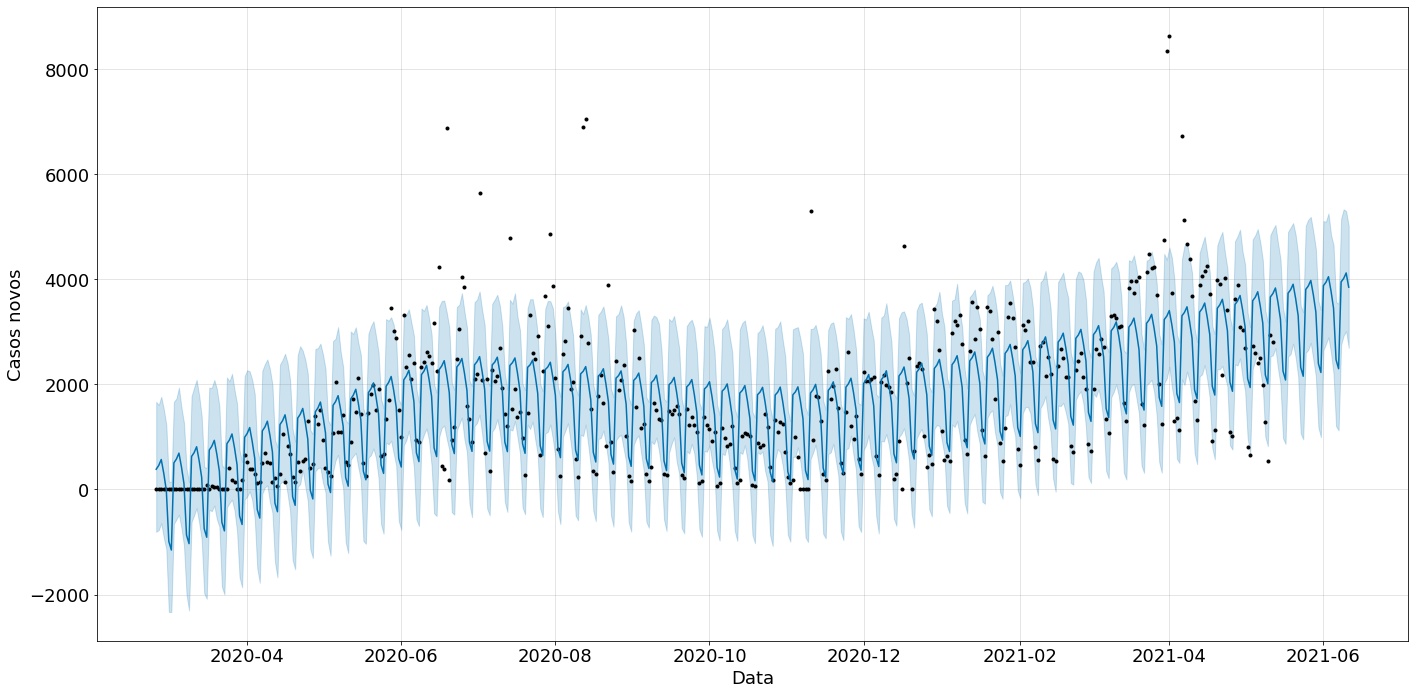

In [ ]:
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10)); #necessario ';' no final da linha do plot

* O modelo.plot() do Prophet precisa ter ';' no final da linha, senão imprime dois gráficos identicos
* **A faixa azul clara mostra intervalo de confiança ("até onde o modelo pode ir")**
 - No dataframe predict os campos yhat_upper e yhat_lower que juntos definem o intervalo de confiança
* A linha azul forte mostra a expectativa mais esperada do modelo
* Os pontos pretos são os que mostram os dados reais de treino

###Dividindo o dataframe de dados em treino e teste
---
Como temos pouco mais de um ano de dados, separaremos os 400 primeiros registros para treino e o restante (43 dias) para teste

In [ ]:
#novo dataframe de treino
df = pd.DataFrame()
df['ds'] = dados_sp['datahora'][:400]
df['y'] = dados_sp['casos_novos'][:400]

#treinando modelo
modelo = Prophet()
modelo.fit(df)

#criando dataframe futuro com os 43 dias restantes dos dados
#para compararmos nosso teste com os dados reais
dataframefuturo = modelo.make_future_dataframe(periods=43)

#testando modelo com um predict dos 43 dias que também temos dados reais
previsao = modelo.predict(dataframefuturo)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#criando dataframe com dados de teste para comparação
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp['datahora'][400:]
df_teste['y'] = dados_sp['casos_novos'][400:]

<h3>Plotagem dos dados de treino do modelo (primeiros 400 dias) e dados de teste da previsão (43 dias de previsão) comparados com os 43 dias finais de dados reais que temos (pontos em vermelho)</h3

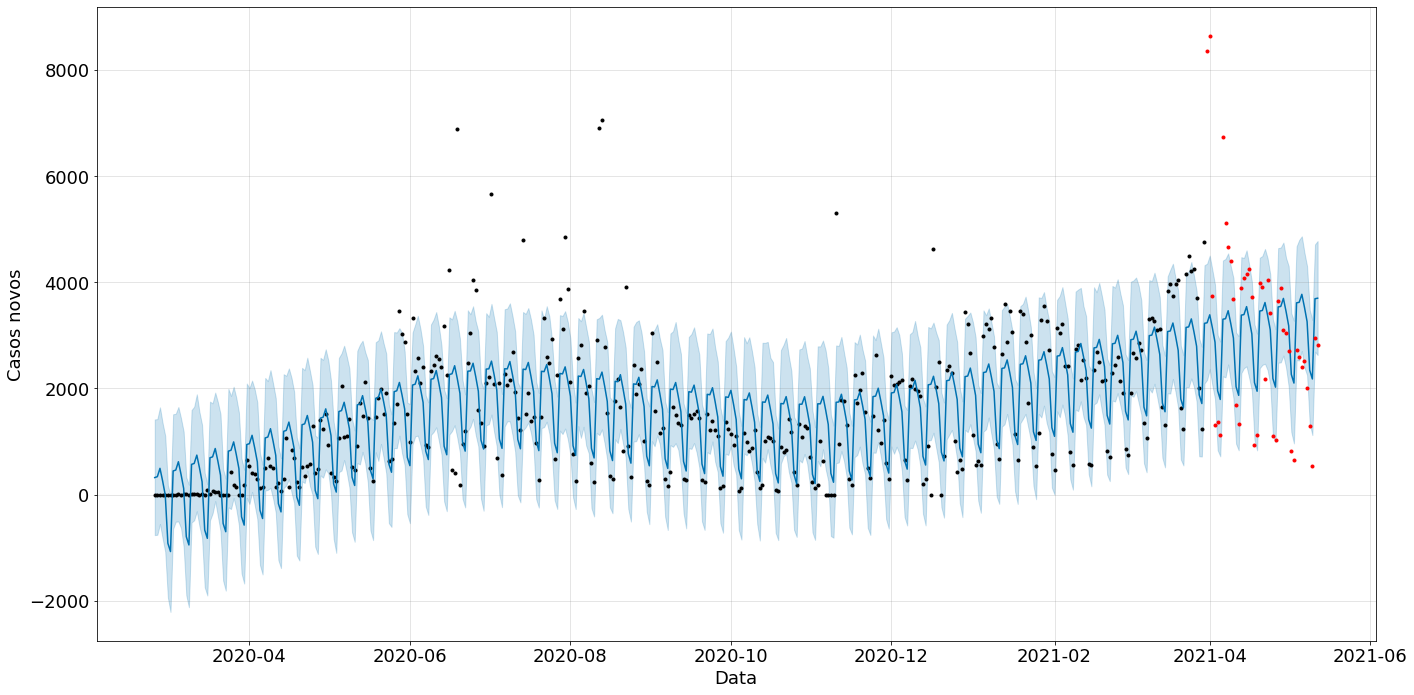

In [ ]:
#plotar gráfico do modelo e previsao dos 43 dias
modelo.plot(previsao, xlabel='Data', ylabel='Casos novos', figsize=(20,10)); #necessario ';' no final da linha do plot
plt.plot(df_teste['ds'], df_teste['y'], '.r')

Podemos concluir que boa parte dos dados de teste estão dentro do intervalo de confiança dos dados previstos, mas não seria o suficiante para levar esse modelo a produção.

**É importante fazer essa análise crítica em cima de dados de teste, pois o modelo treinado poderia ter uma ótima adequação aos dados de treino, mas quando fizéssemos uma previsão, os dados reais podem seguir outra tendência**

###Plotando curva de tendência geral e padrões de sazonalidade com ```modelo.plot_components()```

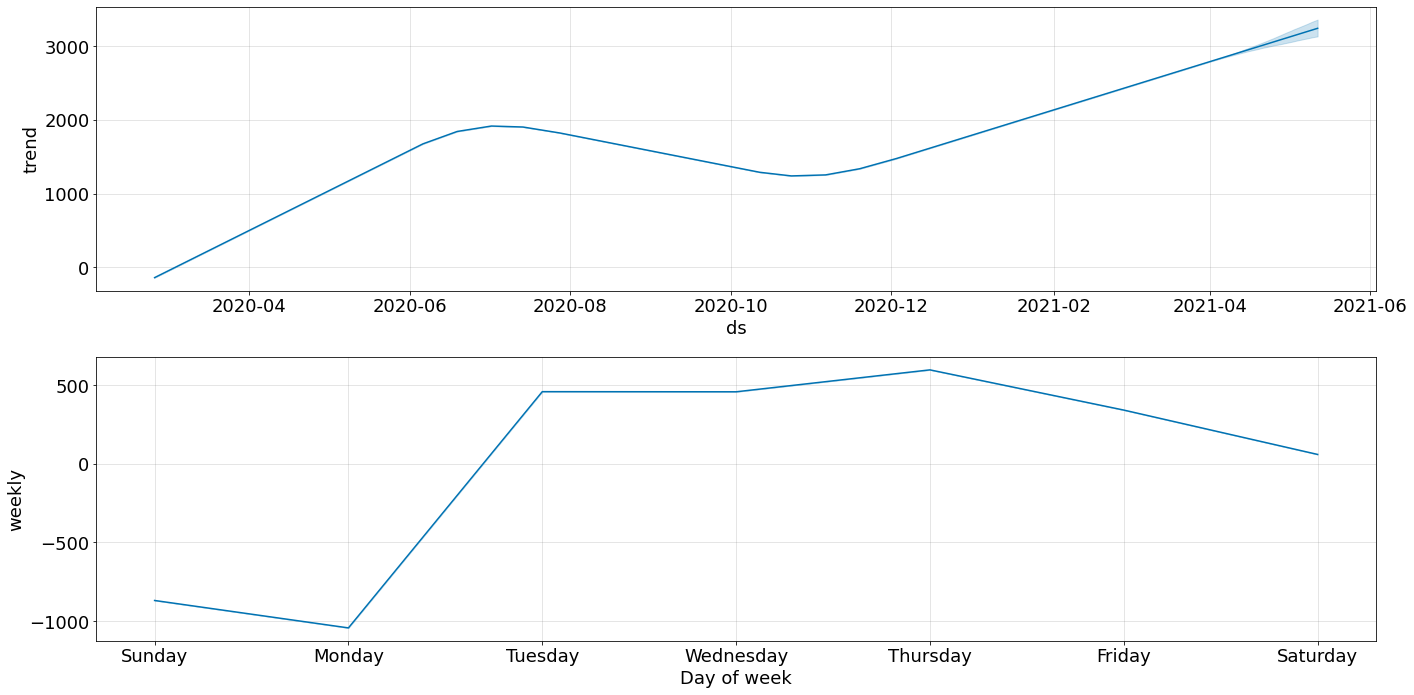

In [ ]:
modelo.plot_components(previsao, figsize=(20,10));

**Sazonalidade semanal bem clara: de Sab a Seg quedas, de Seg a Sex altas**



##DESAFIO: Mudar os periodos de previsão
períodos de 100 dias e de 200 dias

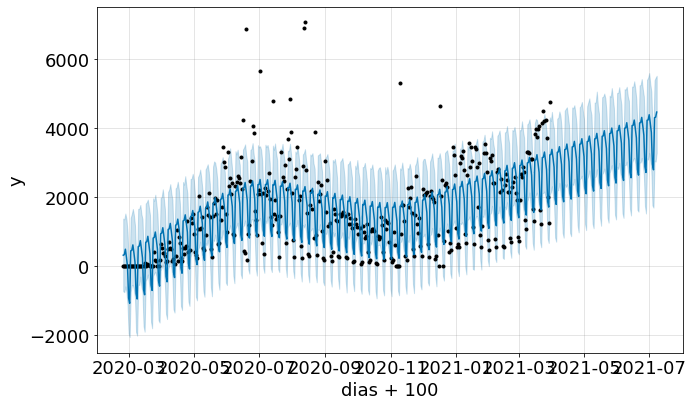

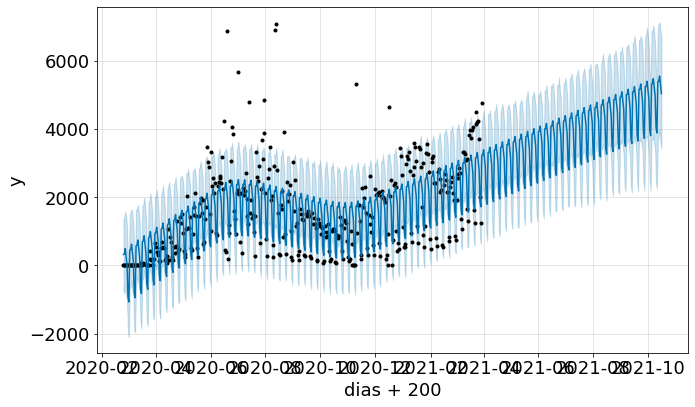

In [ ]:
dataframefuturo100 = modelo.make_future_dataframe(periods=100)

previsao100 = modelo.predict(dataframefuturo100)

modelo.plot(previsao100, xlabel='dias + 100');

dataframefuturo200 = modelo.make_future_dataframe(periods=200)

previsao200 = modelo.predict(dataframefuturo200)

modelo.plot(previsao200, xlabel='dias + 200');

##DESAFIO: Estudar documentação do Prophet, inclusive Github, e melhorar os gráficos
* Olhar site
* Olhar movimentação e orientações no github
* Checar o quick start no github
* Pelo que entendi será usar os df modelo e previsao para plotar usando matplotlib mesmo

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')


Text(0, 0.5, 'Casos acumulados')

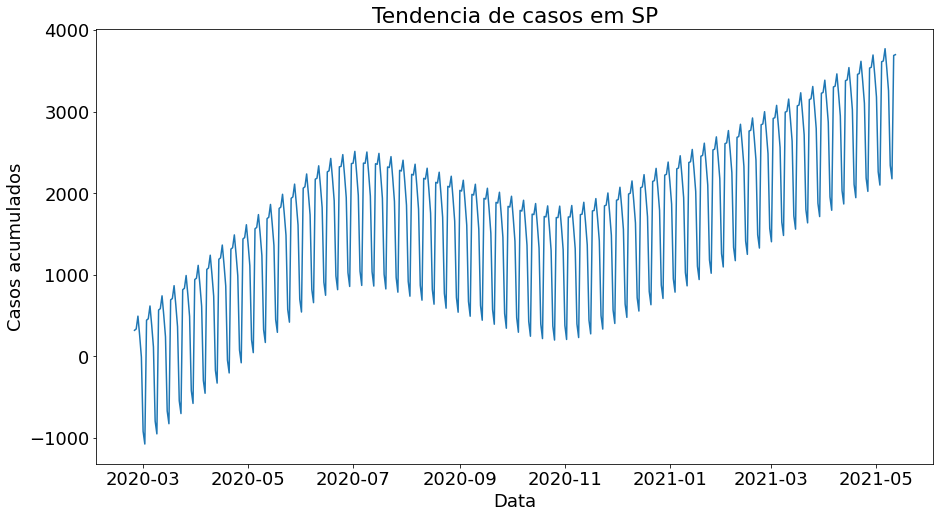

In [ ]:
print(previsao.columns)
sns.lineplot(data=previsao, x='ds', y='yhat')
plt.title('Tendencia de casos em SP')
plt.xlabel('Data')
plt.ylabel('Casos acumulados')

##DESAFIO: Fazer todo o processo de previsão para os casos acumulados

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


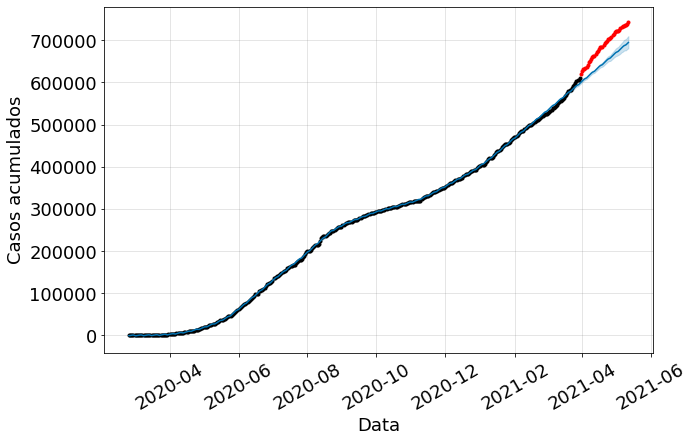

In [ ]:
df_treinoac = pd.DataFrame()
df_treinoac['ds'] = dados_sp['datahora'][:400]
df_treinoac['y'] = dados_sp['casos'][:400]

#criando modelo
modeloac = Prophet()
modeloac.fit(df_treinoac)

#dados de teste do modelo
df_testeac = pd.DataFrame()
df_testeac['ds'] = dados_sp['datahora'][400:]
df_testeac['y'] = dados_sp['casos'][400:]

#criando dataframe futuro
dataframefuturoac = modelo.make_future_dataframe(periods = 43)

#criando previsao
previsaoac = modeloac.predict(dataframefuturoac)

#plotando resultados
modeloac.plot(previsaoac, ylabel='Casos acumulados', xlabel='Data');
plt.xticks(rotation=30)
plt.plot(df_testeac['ds'], df_testeac['y'], '.r')

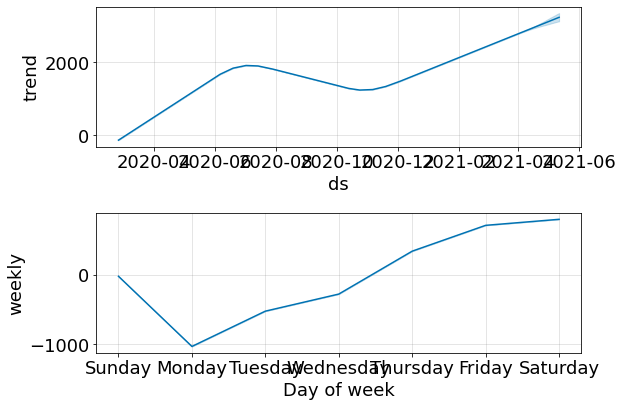

In [ ]:
modeloac.plot_components(previsao);

#Aula 3 - Mudança de tendência
---
Com o ```prophet.plot.add_changepoints_to_plot``` podemos ver as mudanças de tendência no gráfico apontadas pelo próprio prophet

**Mudanças de tendência** são pontos onde a direção da reta de tendência se redireciona quebrando o padrão anterior

**Changepoints** são os pontos que marcam a mudança de tendência do gráfico do prophet. quando mostramos os change points, o prophet também mostra a linha de tendencia destacada em vermelho


In [ ]:
from fbprophet.plot import add_changepoints_to_plot

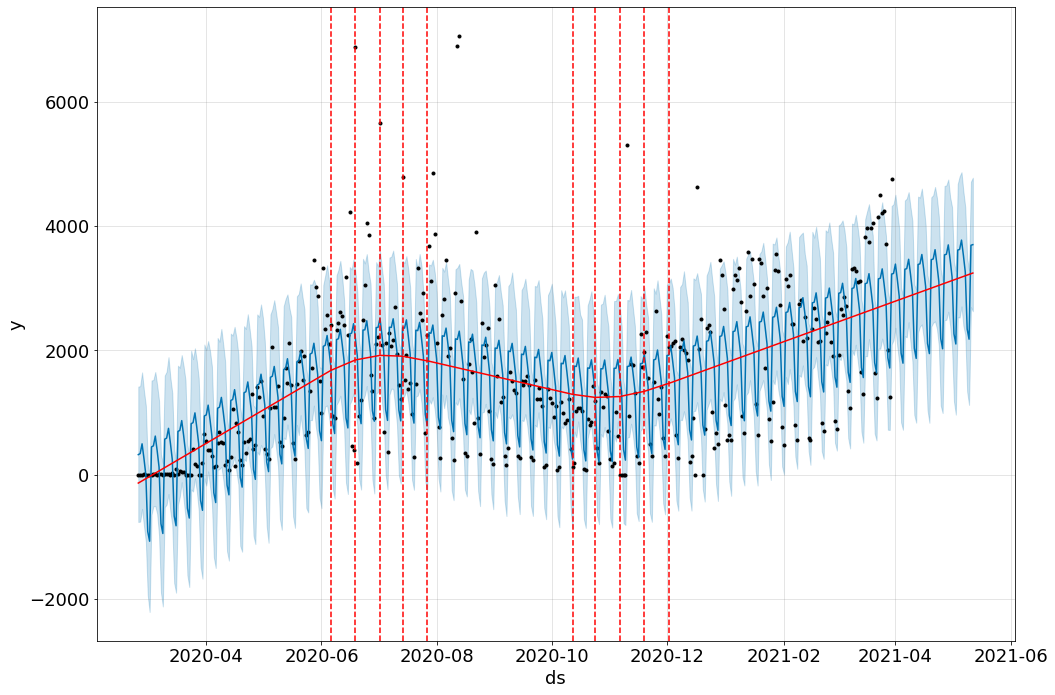

In [ ]:
fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

As retas verticais mostram os pontos de mudança de tendência no nosso modelo

###Adicionando mais parâmetros ao prophet na criação do modelo (**changepoints**)
---
O argumento n_changepoints por padrão é 25. Mudar de 25 para 50 n_changepoints não mudou nossa curva
> **n_changepoints**: Number of potential changepoints to include. Not used
    if input changepoints is supplied. If changepoints is not supplied,
then n_changepoints potential changepoints are selected uniformly from
the first changepoint_range proportion of the history.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


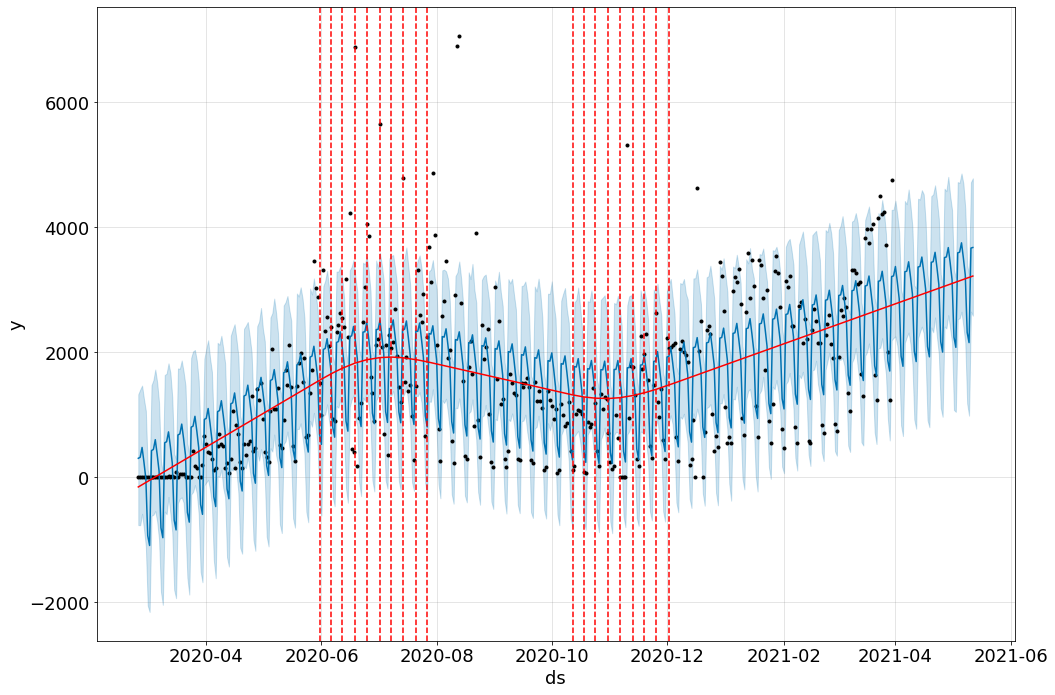

In [ ]:
modelo = Prophet(n_changepoints=50) #por padrao n_changepoints é 25
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataframefuturo)

fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

Mudar de 25 para 50 n_changepoints não mudou nossa curva

###Alterando o parâmetro changepoint_prior_scale de 0.05 para 10.0
---
**Ao alterarmos o changepoint_prior_scale para 10.0 (o padrao é 0.05), aumentamos a sensibilidade e flexibilidade do gráfico a mudanças de tendência como vemos abaixo.** A alteração de 0.05 para 10.0 é um extremo exagero, só foi feito para tornar bem visivel a alteração no grafico

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


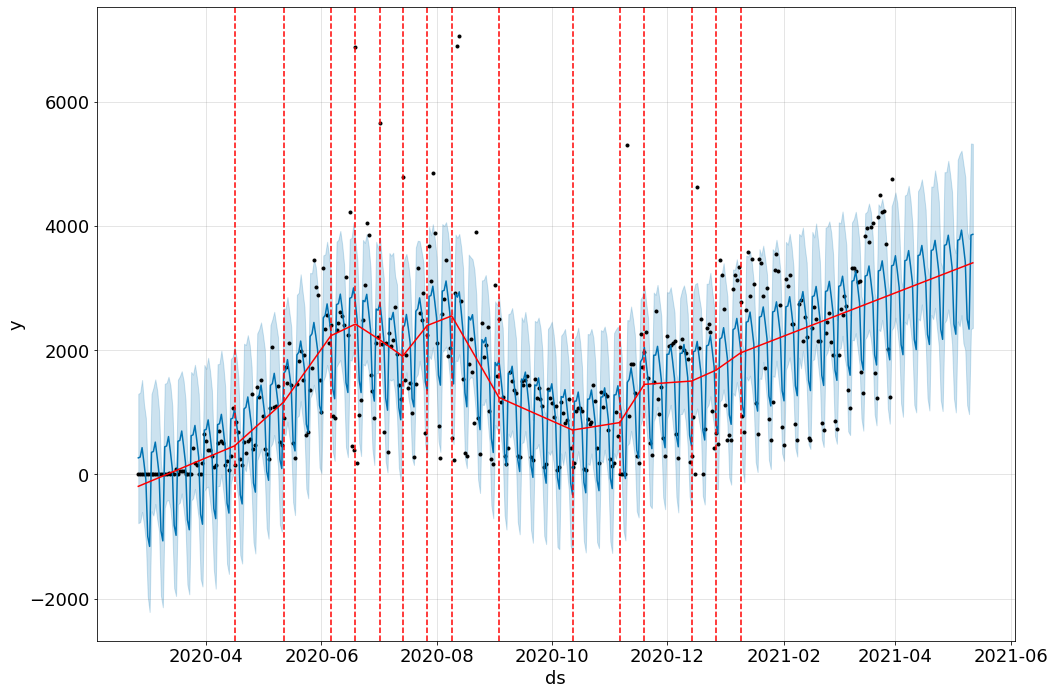

In [ ]:
modelo = Prophet(n_changepoints=25, changepoint_prior_scale=10.0) #por padrao n_changepoints é 25, changepoint_prior_scale é 0.05. Colocamos 10 por EXAGERO!!
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataframefuturo)

fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

###Alterando o parâmetro changepoint_prior_scale de 0.05 para 0.0005
---
**Ao reduzirmos o change_point_prior_scale reduzimos a sensibilidade do modelo a changepoints**, com isso ele constroi um grafico que é praticamente uma reta, uma tendencia de crescimento constante, sem changepoints

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


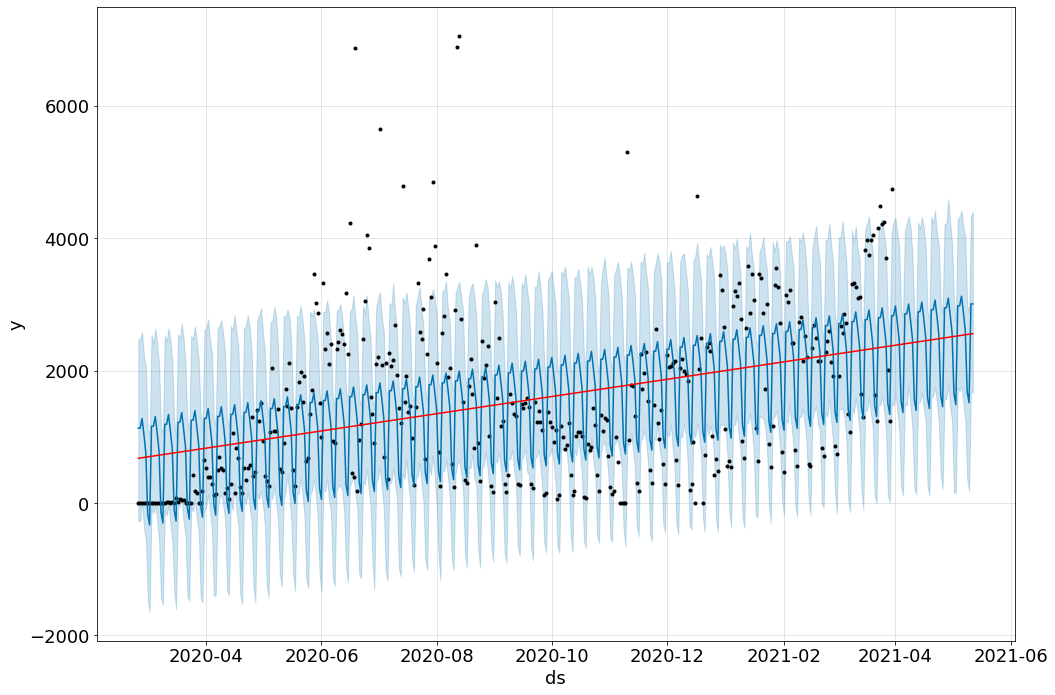

In [ ]:
modelo = Prophet(n_changepoints=25, changepoint_prior_scale=0.0005) #por padrao n_changepoints é 25, changepoint_prior_scale é 0.05
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataframefuturo)

fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

###Inserindo changepoints manualmente (parâmetro changepoints=['yyyy-mm-dd','yyyy-mm-dd',...])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


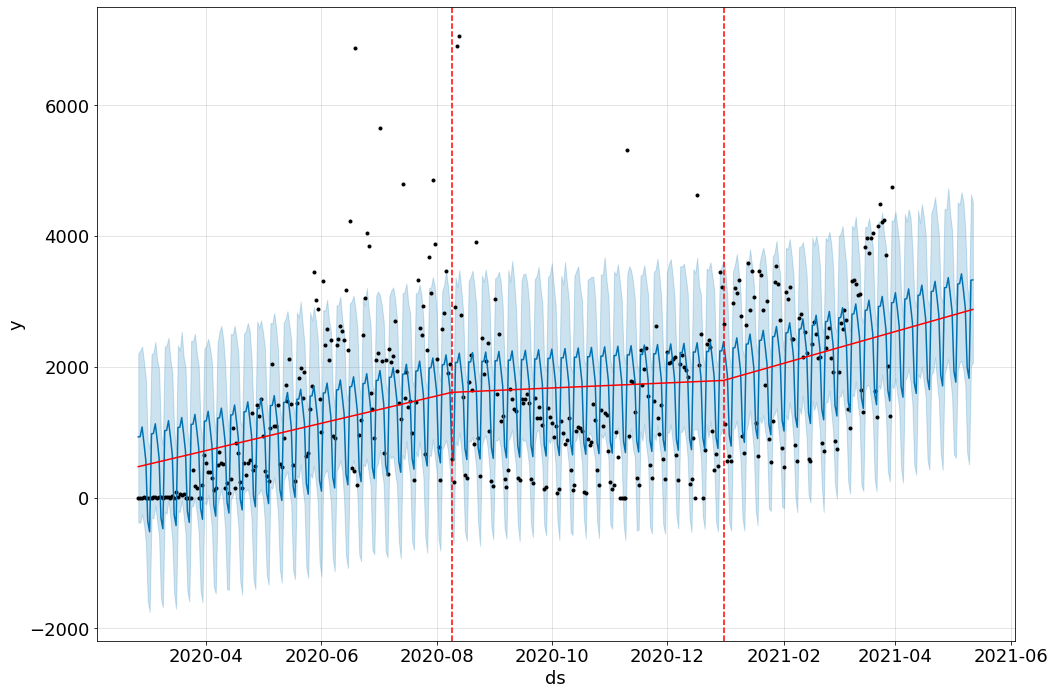

In [ ]:
modelo = Prophet(changepoints=['2020-08-09',  '2020-12-31'])
modelo.fit(df)
dataframefuturo = modelo.make_future_dataframe(periods=43)
previsao = modelo.predict(dataframefuturo)

fig = modelo.plot(previsao, figsize=(15,10))
a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

**Changepoint_range=0.8 por padrão.**

Significa que changepoints só podem ser adicionados até 80% iniciais da séries, se achar que é preciso incluir algum depois, é preciso aumentar esse range.

O Prophet precisa dessa margem disponível para poder definir tendência no final do gráfico

##DESAFIO: Identificar potenciais changepoints no gráfico de barras do .diff() no início do curso [OK]

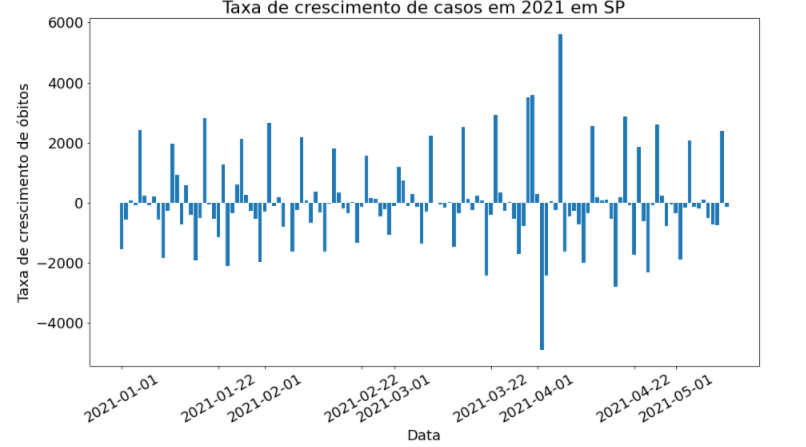

olhando o padrao das barras parece que inicialmente a tendencia é negativa, para o meio do grafico ela cresce e no fim ela cai de novo

##DESAFIO: Desenvolver uma função que crie modelo, treine e gere o grafico [OK]

In [ ]:
def gera_model_graf_prophet(df: pd.DataFrame, periods=43, changepoint_prior_scale=0.05):
  modelo = Prophet(changepoint_prior_scale=changepoint_prior_scale)
  modelo.fit(df)
  dataframefuturo = modelo.make_future_dataframe(periods=periods)
  previsao = modelo.predict(dataframefuturo)

  fig = modelo.plot(previsao, figsize=(15,10))
  a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

  return modelo

def gera_graf_prophet(modelo: Prophet, periods=43, changepoints=True):
  dataframefuturo = modelo.make_future_dataframe(periods=periods)
  previsao = modelo.predict(dataframefuturo)

  fig = modelo.plot(previsao, figsize=(15,10))
  if changepoints:
    a = add_changepoints_to_plot(fig.gca(), modelo, previsao)

  return modelo, previsao

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


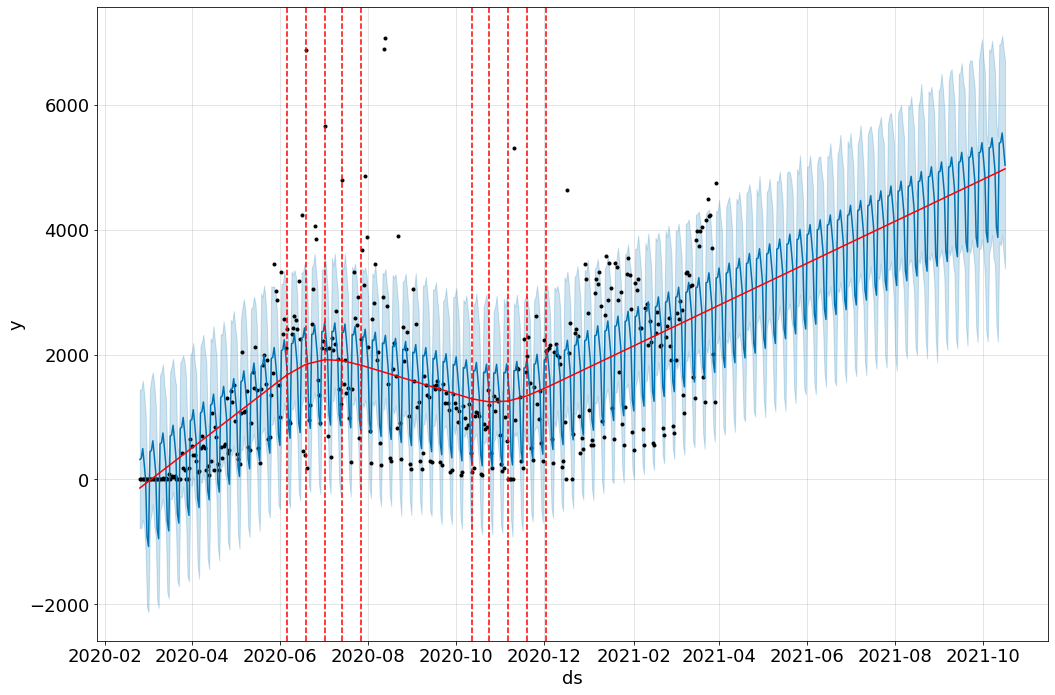

In [ ]:
gera_model_graf_prophet(df, 200)

#Aula 4: feriados e sazonalidade
---
* **Inclusão de feriados** nacionais para ajudar prophet a ignorar datas irrelevantes;
incluídos feriados de SP também

[Artigo da Alura sobre sazonalidade](https://www.alura.com.br/artigos/series-temporais-tipos-de-sazonalidade)

Changepoint_prior_scale retornado para 10 por decisão do professor para aumentar sensibilidade alta da tendencia

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


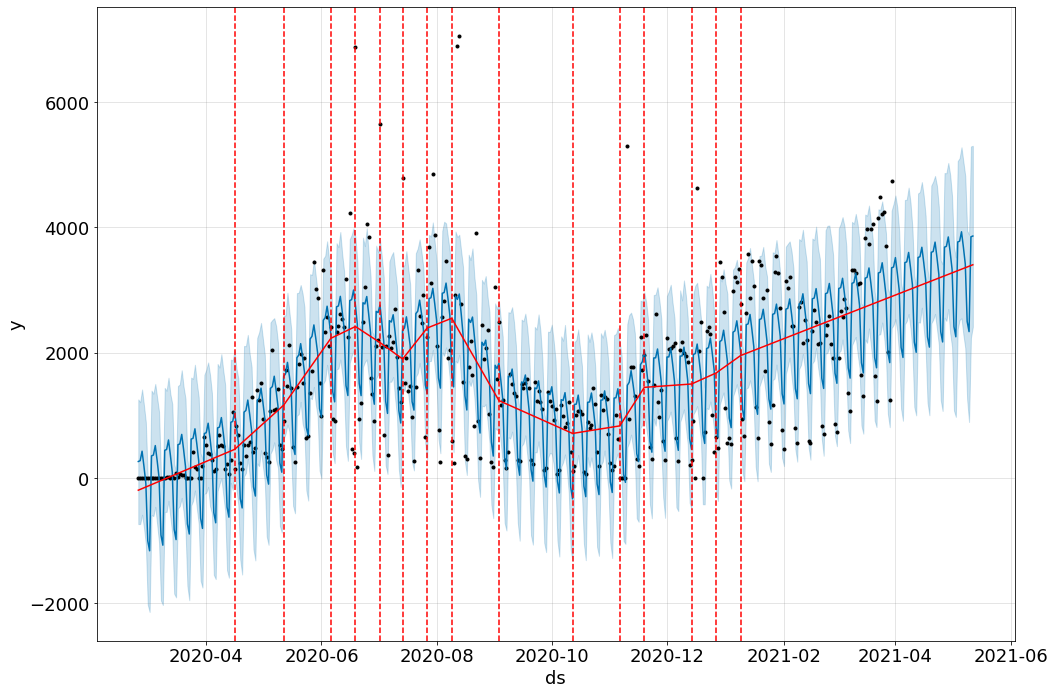

In [ ]:
modelo = gera_model_graf_prophet(df, changepoint_prior_scale=10.0)

###Incluir feriados nacionais automaticamente
---
* ```modelo.add_country_holidays(country_name='BR')``` inclui automaticamente os feriados nacionais do Brasil
* modelo tem q ser recriado pois os feriados precisam ser adicionados antes do fit

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


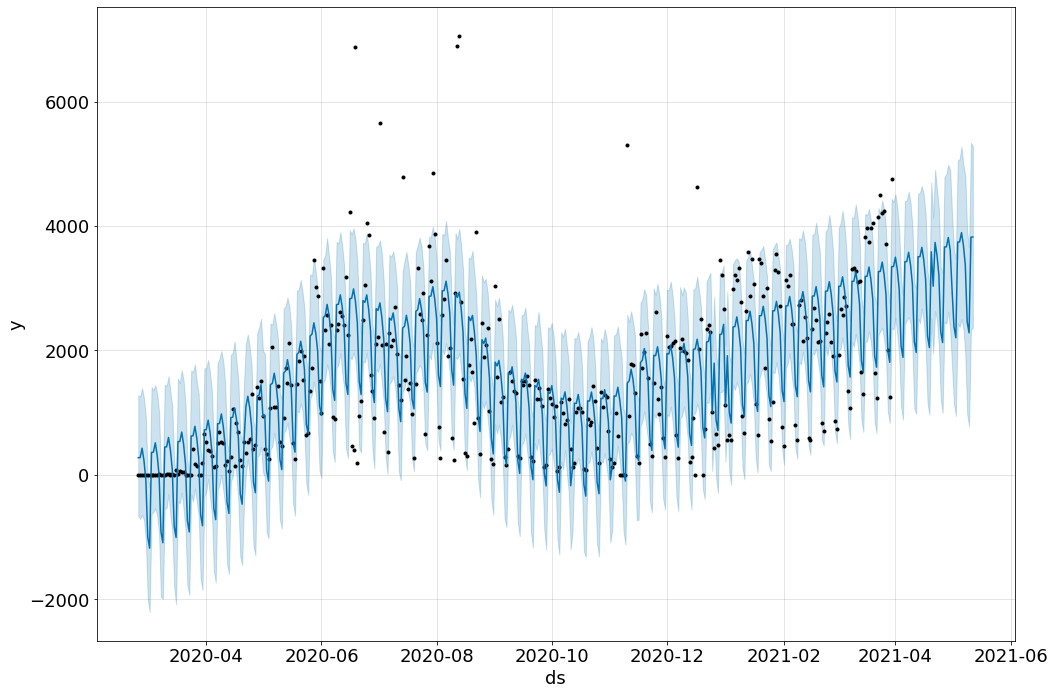

In [ ]:
modelo = Prophet(changepoint_prior_scale = 10) #modelo tem q ser recriado pois os feriados precisam ser adicionados antes do fit
modelo.add_country_holidays(country_name='BR')
modelo.fit(df)
modelo = gera_graf_prophet(modelo, changepoints=False)

<h3>Com a inclusão de feriados vemos uma quebra na tendencia principalmente no natal e ano novo</h3>

###Incluindo feriados de SP através de lista
--- 
* Criamos dois dataframes de feriados, um para 2020 e outro para 2021
* Usamos o pd.concat() 
* Detalhe que ao criar os dfs passamos ```'holiday': 'sp_2020'``` e nisso conseguimos fazer com que na coluna ```holiday``` tivessemos ```sp_2020``` em todas as linhas

In [ ]:
#Usando feriados especificos do municipio de SP

feriados_sp_2020 = [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21', 
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021 = [
'2021-01-01',
'2021-01-25',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-26',
'2021-03-29',
'2021-03-30',
'2021-03-31',
'2021-04-01',
'2021-04-02',
'2021-04-21',
'2021-05-01'
]


feriados_sp_2020 = pd.DataFrame({
  'holiday': 'sp_2020',
  'ds': pd.to_datetime(feriados_sp_2020)
})

feriados_sp_2021 = pd.DataFrame({
  'holiday': 'sp_2021',
  'ds': pd.to_datetime(feriados_sp_2021)
})

feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))
display(feriados.head())
display(feriados.tail())

holiday         ds
0  sp_2020 2020-02-25
1  sp_2020 2020-02-26
2  sp_2020 2020-04-10
3  sp_2020 2020-02-25
4  sp_2020 2020-02-26

holiday         ds
8   sp_2021 2021-03-31
9   sp_2021 2021-04-01
10  sp_2021 2021-04-02
11  sp_2021 2021-04-21
12  sp_2021 2021-05-01

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


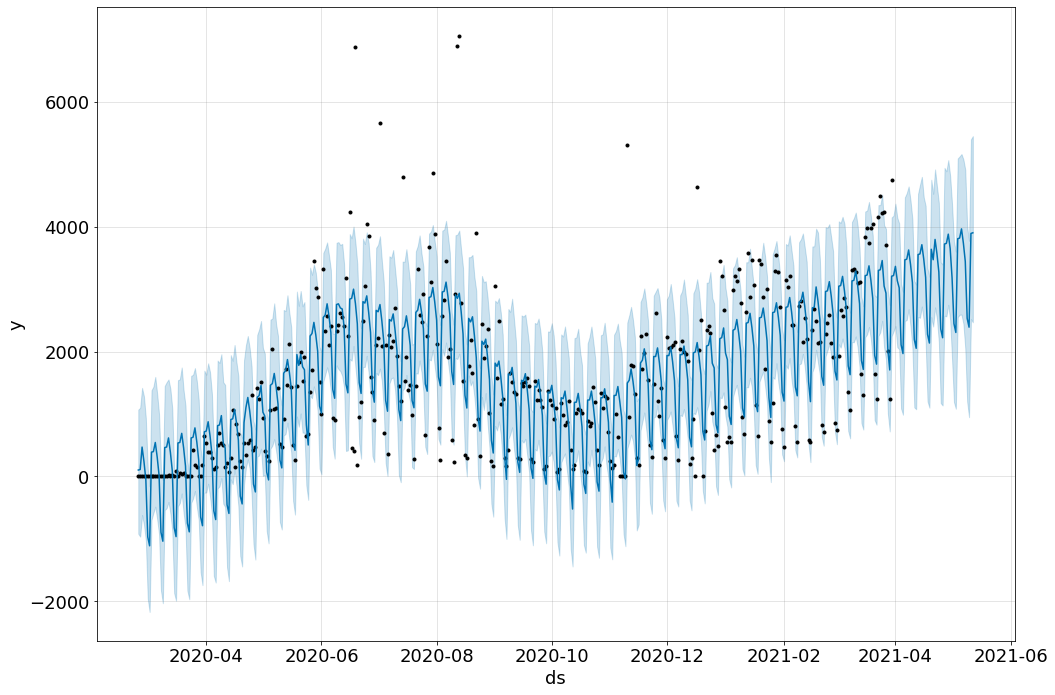

In [ ]:
modelo_feriados = Prophet(changepoint_prior_scale=10, holidays=feriados)
modelo_feriados.fit(df)
modelo_feriados, previsao = gera_graf_prophet(modelo_feriados, 43, False)


<h3>Abaixo podemos ver que os feriados de 2021 foram considerados pelo prophet com menor impacto do que os feriados de 2020</h3>

* A linha de tendência, que é a primeira, apresenta ao fim o intervalo de confiança, que são os possíveis erros de previsão
* **Os picos do gráfico de holidays** apresenta o **decréscimo no número de casos notificados** naquele feriado
* **O tipo de sazonalidade pode ser configurada no Prophet entre aditiva e multiplicativa, por padrão é aditiva**. Ela é visível nos graficos de sazonalidade semanal e outros periodos

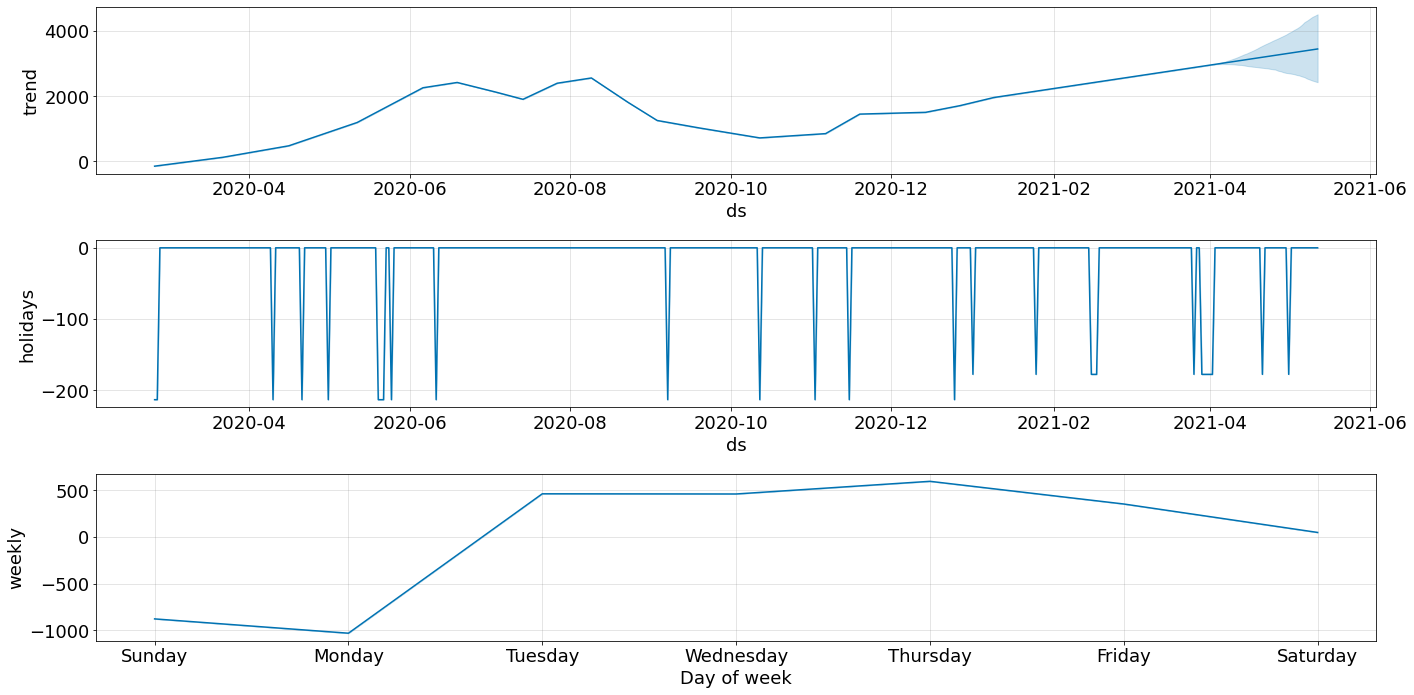

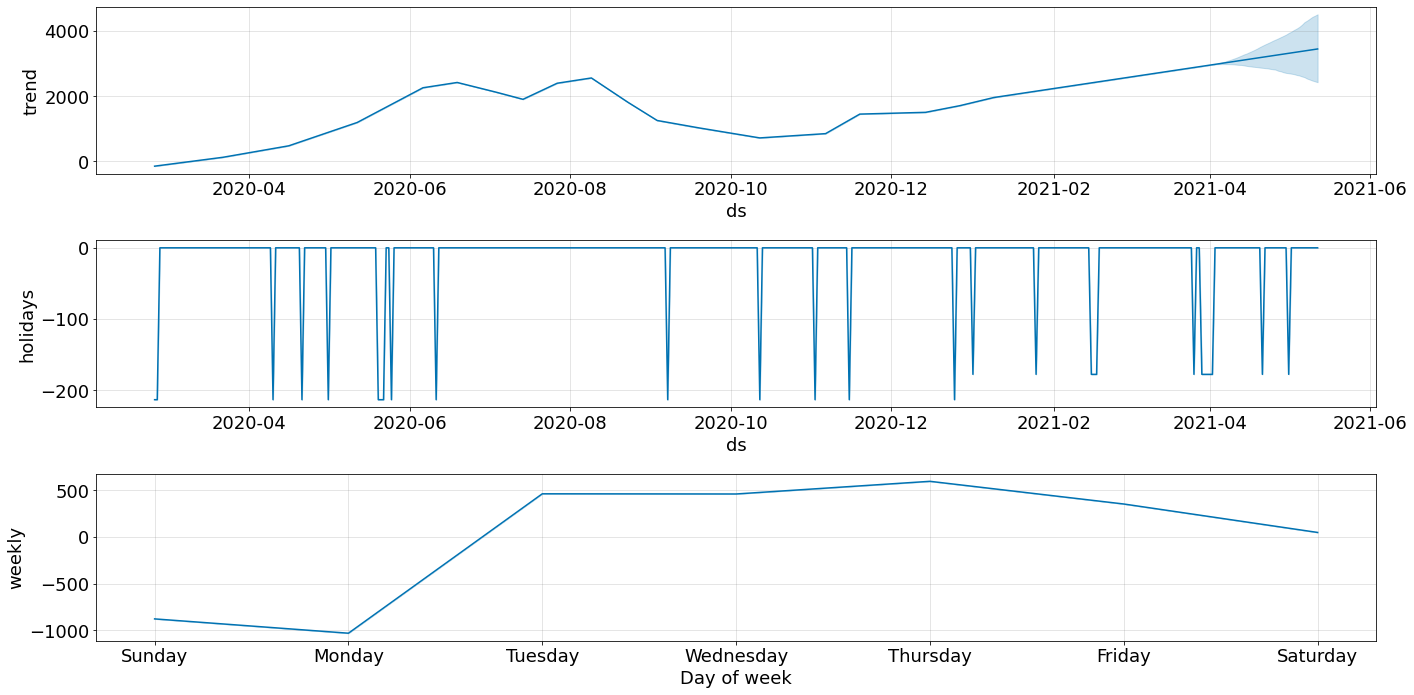

In [ ]:
modelo_feriados.plot_components(previsao, figsize=(20,10))

###Comparando erro médio entre modelos com sazonalidade aditiva e multiplicativa
---
* O modelo anterior usa sazonalidade aditiva, que é padrão. Abaixo calculamos com ```sklearn.metrics.mean_absolute_error()``` o erro de 536.60 com sazonalidade aditiva
* **Treinado modelo com sazonalidade multiplicativa. Seu erro médio foi menor**, de 452.36.


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
#erro médio para o modelo com sazonalidade padrão, aditiva
mean_absolute_error(df['y'], previsao['yhat'][:400])

536.6084252994144

<h4>Modelo com sazonalidade multiplicativa e seu erro médio</h4>

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


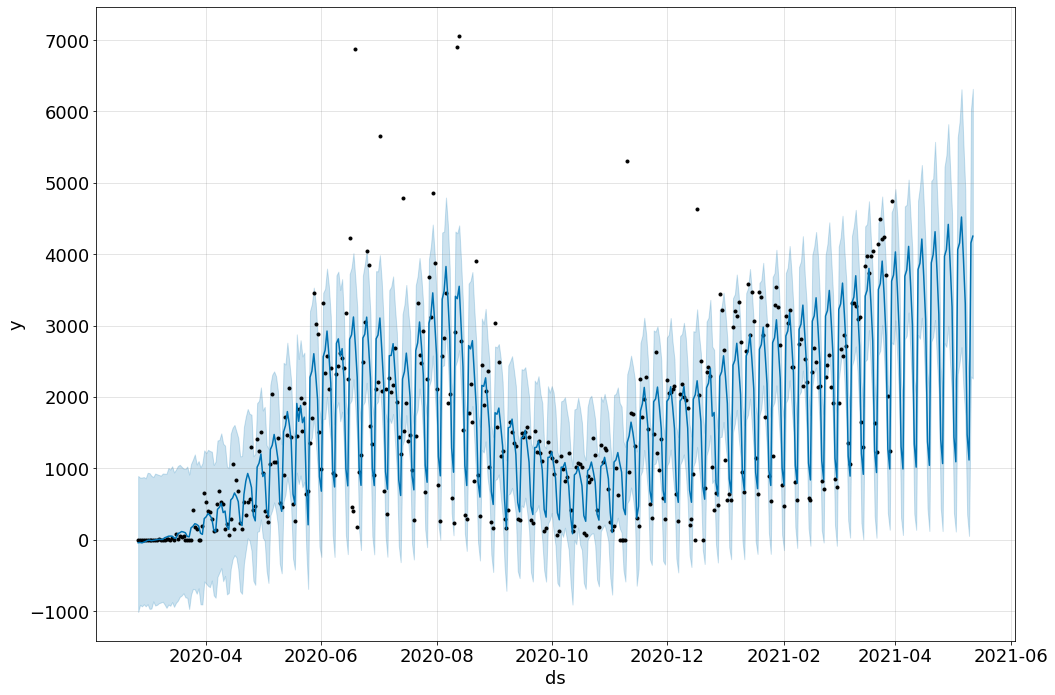

In [ ]:
modelo_feriados_mult = Prophet(changepoint_prior_scale=10, holidays=feriados, seasonality_mode='multiplicative')
modelo_feriados_mult.fit(df)
modelo_feriados_mult, previsao_mult = gera_graf_prophet(modelo_feriados_mult,43,False)

In [ ]:
#erro médio do modelo com sazonalidade multiplicativa
mean_absolute_error(df['y'], previsao_mult['yhat'][:400])

452.3618279357078

##DESAFIO: Plotar casos reais em grafico de linhas

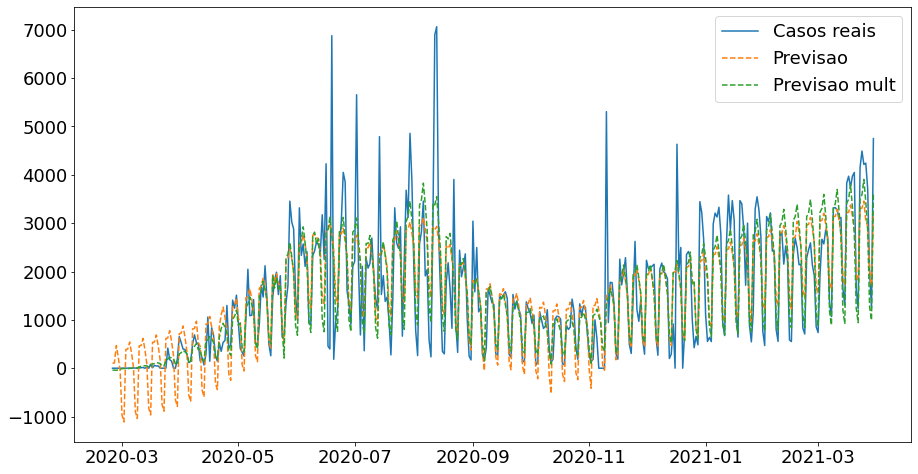

In [ ]:
plt.plot(df.ds, df.y, label='Casos reais')
plt.plot(df.ds, previsao.yhat[:400],'--', label='Previsao')
plt.plot(df.ds, previsao_mult.yhat[:400],'--', label='Previsao mult')
plt.legend()

##Desafio Extra: Utilizar outras métricas do Scikitlearn e comparar os resultados.
---
Na documentação do scikitlearn metrics temos vários outros métodos além de mean_absolute_error na área de regression metrics.
Dos quais vamos usar:
* mean_squared_error
* mean_absolute_percentage_error (**a partir da versao 0.24 so sklearn**, eu não soube atualizar aqui no colab)
* r2_score

**Em todas as métricas o modelo com sazonalidade multiplicativa ganham na precisão**

Na documentação do scikit learn temos:
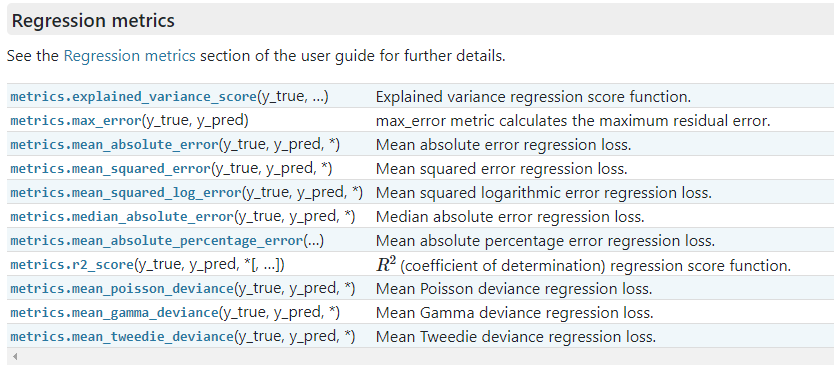

In [ ]:
#accuracy_score só serve para multilabel classification, não para intervalos de valores continuos
#accuracy_score(df.y, previsao.yhat[:400]) #Classification metrics can't handle a mix of multiclass and continuous targets

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
print('Erro quadratico médio para modelo com sazonalidade aditiva')
print(mean_squared_error(df.y, previsao.yhat[:400]))
print('Erro quadratico médio para modelo com sazonalidade multiplicativa')
mean_squared_error(df.y, previsao_mult.yhat[:400])


Erro quadratico médio para modelo com sazonalidade aditiva
609349.6549722457
Erro quadratico médio para modelo com sazonalidade multiplicativa


523056.0437642187

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print('R2 score para modelo com sazonalidade aditiva')
print(r2_score(df.y, previsao.yhat[:400]))
print('R2 score para modelo com sazonalidade multiplicativa')
r2_score(df.y, previsao_mult.yhat[:400])

R2 score para modelo com sazonalidade aditiva
0.6328084203636588
R2 score para modelo com sazonalidade multiplicativa


0.684808593258551

#Aula 5: Outliers e validação

##Video 1: Outliers e intervalo de confiança
---
* Eliminaremos os outliers do df para treinar novo modelo sem outliers
* Como outliers definimos nesse exemplo todos os pontos de dados reais que não se encaixam dentro do intervalo de confiança apresentado pelo prophet no treino inicial
* Desta forma nosso df sem outliers será resultado de uma filtragem de dados maiores que o yhat_lower (minimo do intervalo de confiança) e menores que o yhat_upper (maximo do intervalo de confiança)


In [ ]:
novo_y = df.reset_index()

In [ ]:
sem_outliers = novo_y[(novo_y['y']<previsao['yhat_upper'][:400]) & (novo_y['y']>previsao['yhat_lower'][:400])]

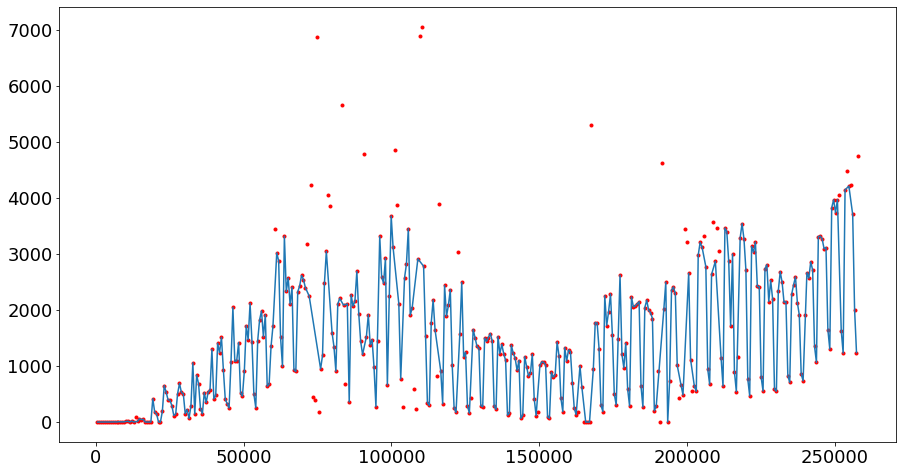

In [ ]:
plt.plot(df.index, df['y'],'r.')
plt.plot(sem_outliers['index'],sem_outliers['y'])

###Treinando modelo sem outliers

In [ ]:
df_sem_outliers = sem_outliers[['ds','y']]

In [ ]:
df_sem_outliers.head()

ds  y
0 2020-02-25  0
1 2020-02-26  0
2 2020-02-27  0
3 2020-02-28  1
4 2020-02-29  0

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


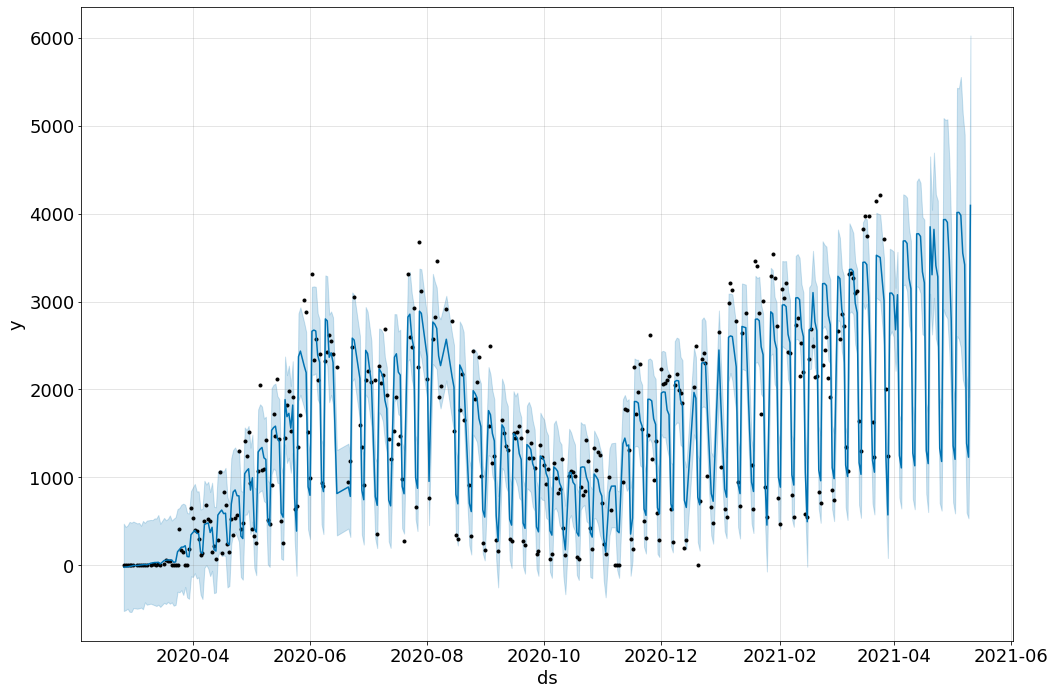

In [ ]:
modelo_feriados = Prophet(changepoint_prior_scale=10, holidays=feriados, seasonality_mode='multiplicative')
modelo_feriados.fit(df_sem_outliers)
modelo_feriados, previsao = gera_graf_prophet(modelo_feriados,43, False)

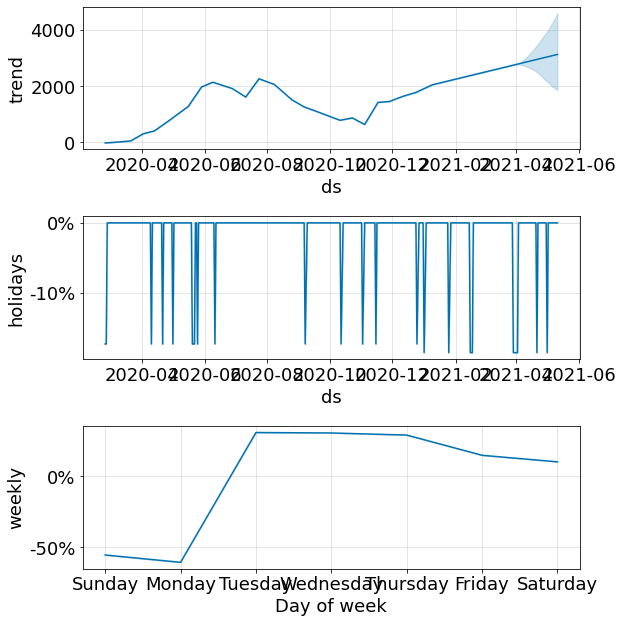

In [ ]:
modelo_feriados.plot_components(previsao);

###Predictive Samples
___
Todas as possíveis soluções que contem no intervalo de confiança da previsão.

Para a previsão o prophet testa diversos coeficientes, plotar o predictive samples nos mostra todas as retas que o prophet testou a possibilidade para previsão

In [ ]:
amostras = modelo_feriados.predictive_samples(previsao)

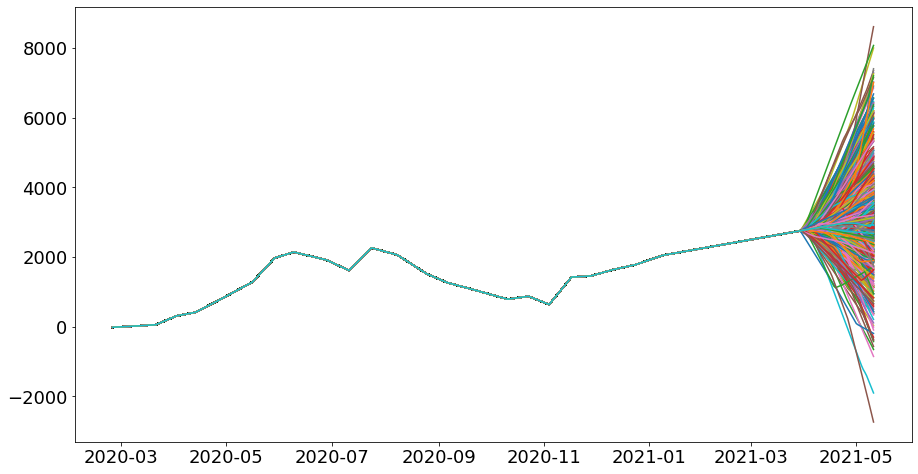

In [ ]:
plt.plot(previsao['ds'], amostras['trend']);

## Propriedade Interval Width 
---
###DESAFIO: Testar a influência da alteração da variável intervalo de confiança (Interval width)
---
* Interval width padrão é de 0.8
* O limite é 1, se maior que isso ocorre o erro ```Percentiles must be in the range [0, 100]```


<h3> Intervalo = 1 </h3>
Aparentemente o limite do intervalo. Com isso o intervalo de confiança fica tão exagerado que engloba todo e qualquer dado da série

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


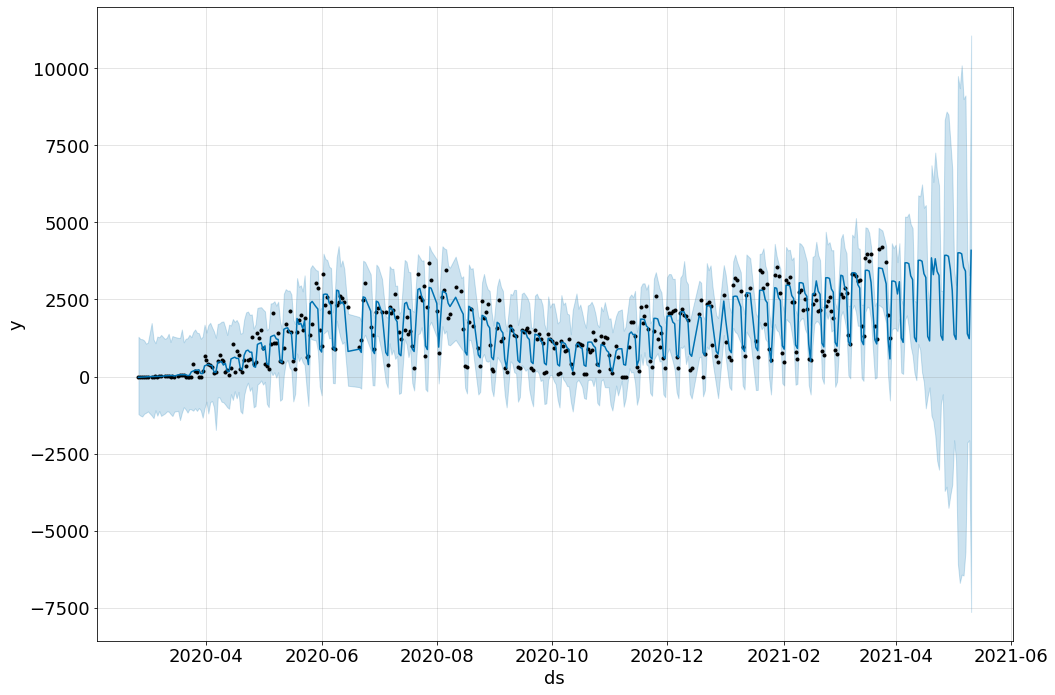

In [ ]:
modelo_feriados = Prophet(changepoint_prior_scale=10, holidays=feriados, seasonality_mode='multiplicative', interval_width=1)
modelo_feriados.fit(df_sem_outliers)
modelo_feriados, previsao = gera_graf_prophet(modelo_feriados,43, False)

<h3> Intervalo = 0.3 </h3>
Aparentemente intervalo quase mínimo. Com esse valor o intervalo de confiança não vai muito além da curva de tendência.

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


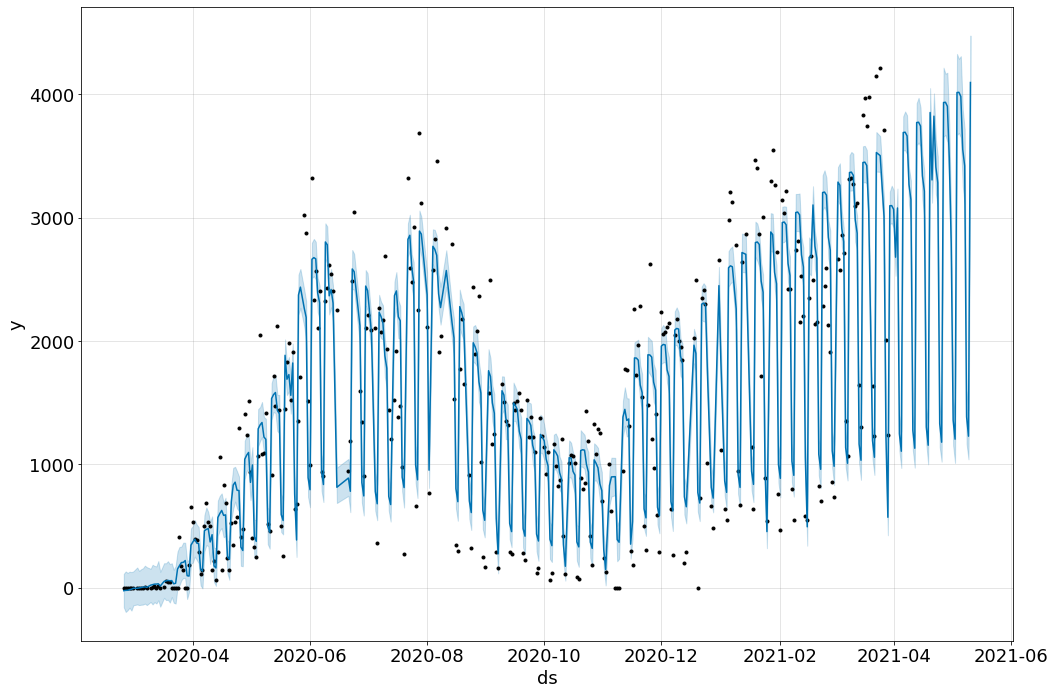

In [ ]:
modelo_feriados = Prophet(changepoint_prior_scale=10, holidays=feriados, seasonality_mode='multiplicative', interval_width=0.3,)
modelo_feriados.fit(df_sem_outliers)
modelo_feriados, previsao = gera_graf_prophet(modelo_feriados,43, False)

##DESAFIO: Plotar os dados de teste sobre o modelo sem outliers e analisar se ocorreu melhor ajuste

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


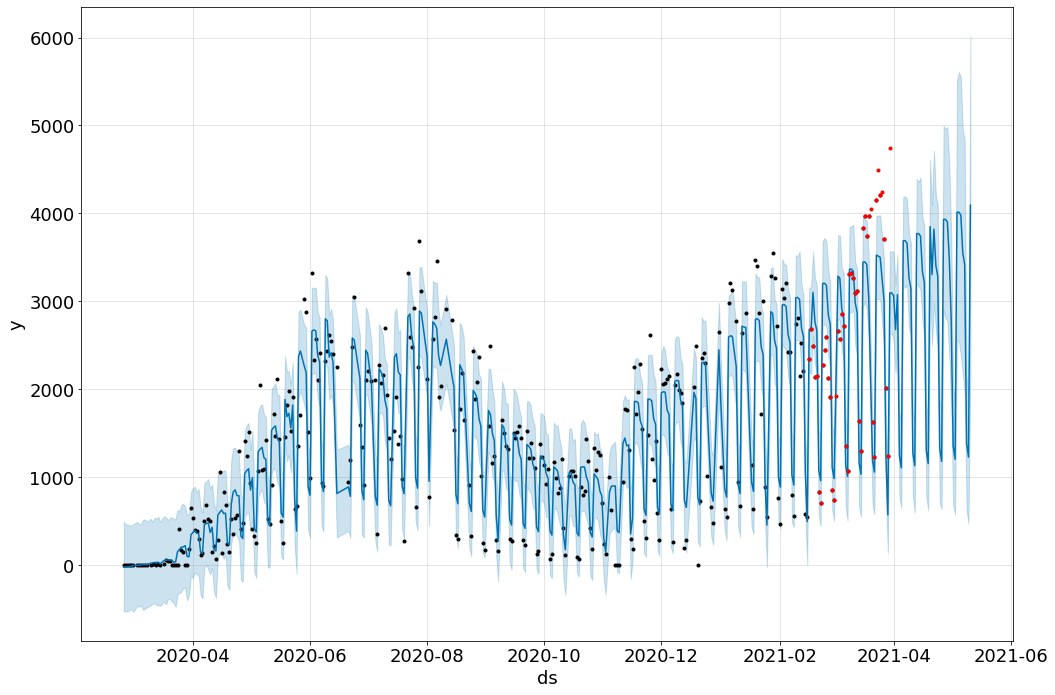

In [ ]:
modelo_feriados = Prophet(changepoint_prior_scale=10, holidays=feriados, seasonality_mode='multiplicative')
modelo_feriados.fit(df_sem_outliers)
modelo_feriados, previsao = gera_graf_prophet(modelo_feriados,43, False)
plt.plot(df['ds'][-43:],df['y'][-43:],'r.')

##DESAFIO: Analisar previsao sem outliers com Métricas
* Todos os erros foram menores sem outliers
* R2 score sem outliers é 0.867573, com outliers foi 0.684808593258551
* Erro quadratico medio sem outliers é 144891.015898, com outliers foi 523056.0437642187
* Erro absoluto medio sem outliers é 280.533657, com outliers foi 452.3618279357078

In [ ]:
print("R2 score sem outliers é %f, com outliers foi 0.684808593258551" % r2_score(df_sem_outliers.y, previsao.yhat[:352])) #R2 score para modelo com sazonalidade multiplicativa 0.684808593258551
print("Erro quadratico medio sem outliers é %f, com outliers foi 523056.0437642187" % mean_squared_error(df_sem_outliers.y, previsao.yhat[:352])) #Erro quadratico médio para modelo com sazonalidade multiplicativa 523056.0437642187
print("Erro absoluto medio sem outliers é %f, com outliers foi 452.3618279357078" % mean_absolute_error(df_sem_outliers.y, previsao.yhat[:352])) #452.3618279357078

R2 score sem outliers é 0.867573, com outliers foi 0.684808593258551
Erro quadratico medio sem outliers é 144891.015898, com outliers foi 523056.0437642187
Erro absoluto medio sem outliers é 280.533657, com outliers foi 452.3618279357078


##Vídeo 2: Validação cruzada e métricas

In [ ]:
from fbprophet.diagnostics import cross_validation

In [ ]:
df_cv = cross_validation(modelo_feriados,initial='180 days',period='30 days', horizon = '30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-08-31 00:00:00 and 2021-02-27 00:00:00


In [ ]:
janela = 1

In [ ]:
df_cv.head()

ds         yhat   yhat_lower   yhat_upper     y     cutoff
0 2020-09-02  1866.697652  1414.628196  2334.635090  1579 2020-08-31
1 2020-09-03  1790.211275  1284.817841  2302.938835  2496 2020-08-31
2 2020-09-04  1708.915470  1191.477313  2183.989837  1166 2020-08-31
3 2020-09-05  1490.392729   958.693015  2004.485239  1245 2020-08-31
4 2020-09-06   706.482821   196.723546  1193.309334   290 2020-08-31

In [ ]:
cutoff = df_cv['cutoff'].unique()
cutoff

array(['2020-08-31T00:00:00.000000000', '2020-09-30T00:00:00.000000000',
       '2020-10-30T00:00:00.000000000', '2020-11-29T00:00:00.000000000',
       '2020-12-29T00:00:00.000000000', '2021-01-28T00:00:00.000000000',
       '2021-02-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
cutoff = df_cv['cutoff'].unique()[janela]
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]

Text(0.5, 0, 'ds')

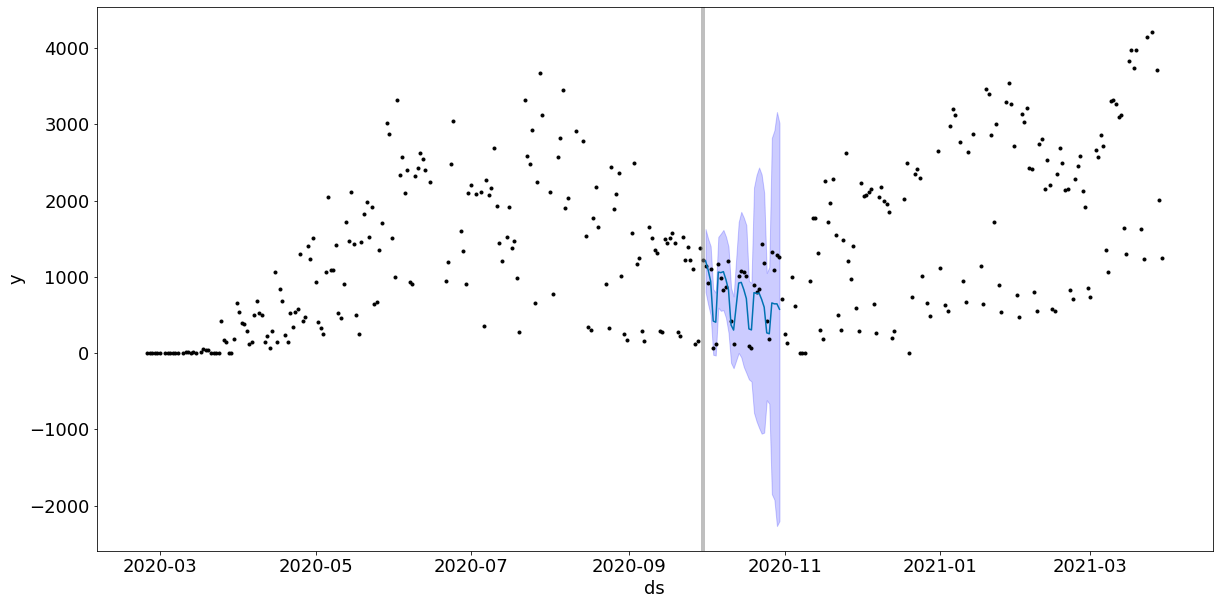

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(modelo_feriados.history['ds'].values, modelo_feriados.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'], df_cv_cut['yhat_upper'], color='blue', alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')


##Métricas com o performance_metrics
---
O Prophet tem modelo, treino, teste e até métricas builtin

In [ ]:
from fbprophet.diagnostics import performance_metrics

In [ ]:
df_p = performance_metrics(df_cv)

INFO:fbprophet:Skipping MAPE because y close to 0


In [ ]:
df_p

horizon            mse        rmse         mae     mdape  coverage
0   3 days  168709.173876  410.742223  288.652881  0.181658  0.777778
1   4 days  199988.072552  447.200260  345.534166  0.201258  0.722222
2   5 days  205685.346532  453.525464  365.012440  0.239935  0.777778
3   6 days  123792.554947  351.841662  320.115420  0.251259  0.855556
4   7 days  101624.184354  318.785483  276.283825  0.116423  0.944444
5   8 days  163108.460925  403.866885  352.462490  0.197110  0.785714
6   9 days  144201.916008  379.739274  322.596541  0.187267  0.777778
7  10 days  141358.853324  375.977198  335.317034  0.198873  0.805556
8  11 days   96326.268096  310.364734  276.038617  0.136460  0.841270
9  12 days   98154.571661  313.296300  255.551931  0.114032  0.833333
10 13 days  160222.874902  400.278497  317.302205  0.158481  0.740741
11 14 days  310502.163831  557.227210  436.396041  0.224047  0.682540
12 15 days  340244.836752  583.305097  484.844243  0.370209  0.629630
13 16 days  285366.877440  534.197414  409.919243  0.216419  0.690476
14 17 days  213219.084480  461.756521  358.296423  0.258038  0.698413
15 18 days  308461.513029  555.393116  412.886941  0.263963  0.685185
16 19 days  328220.397412  572.905226  441.955688  0.263963  0.712963
17 20 days  440619.771668  663.791964  508.920658  0.281878  0.744444
18 21 days  526775.035098  725.792694  561.611789  0.336900  0.682540
19 22 days  544375.308284  737.817937  574.710646  0.384453  0.642857
20 23 days  406114.649648  637.271253  496.902787  0.223516  0.722222
21 24 days  351794.685939  593.122825  461.852697  0.203159  0.769841
22 25 days  291939.364505  540.314135  418.429537  0.321681  0.849206
23 26 days  588449.291960  767.104486  552.456193  0.326608  0.753968
24 27 days  619689.207013  787.203409  589.704859  0.414443  0.777778
25 28 days  742974.296109  861.959568  674.387634  0.433606  0.666667
26 29 days  528662.934519  727.092109  605.626521  0.501846  0.722222
27 30 days  527626.728293  726.379190  593.486806  0.505118  0.685185

<h3>Lista de métricas obtidas para o modelo passando o crossvalidate para o performance_metrics</h3>

rmse = Root Mean Square Error ou Erro médio quadrático

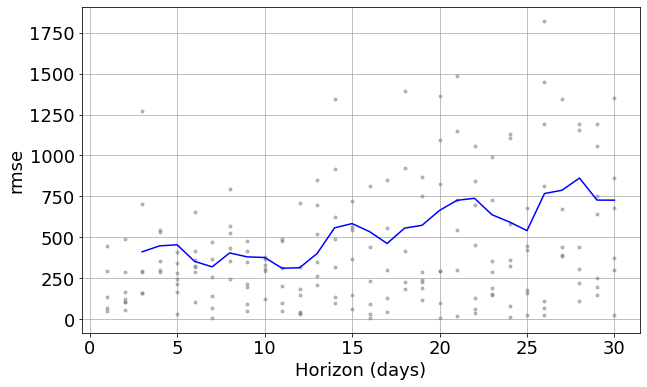

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='rmse');

Pela métrica acima, podemos ver que na janela de 30 dias, quanto mais dias ele prevê mais dispersos ficam os dados(cinza) da previsão (aazul)

##DESAFIO: Descobrir o que significa cada tipo de erro
---
The statistics computed are 
* **mean squared error (MSE)** - erro quadratico medio
  - a média da soma dos quadrados dos erros
* **root mean squared error (RMSE)** - raiz quadrada do erro medio
  - a média da soma das raízes dos erros
* **mean absolute error (MAE)** - erro médio absoluto
  - a média da soma de todos os erros
* **mean absolute percent error (MAPE)** - erro médio percentual absoluto
  - a média dos erros percentuais total
* **median absolute percent error (MDAPE)** - 
 - A mediana dos erros absolutos percentuais

##Desafio 14: Buscar quais métricas se aplicam a quais casos.
---
**<h4>Erro Quadrático Médio - MSE</h4>**

O erro quadrático médio, MSE (da sigla em inglês Mean Squared Error),dá um maior peso aos maiores erros, já que, ao ser calculado, cada erro é elevado ao quadrado individualmente e, após isso, a média desses erros quadráticos é calculada.

**Por conta do expoente ao quadrado que o erro assume, essa métrica é bastante sensível a outliers** (valores discrepantes) e, caso tenha muitos erros significativos em sua análise, essa métrica poderá ser extrapolada.

**<h4>Raiz Quadrada do Erro Médio - RMSE</h4>**
A raiz quadrada do erro médio, RMSE (da sigla em inglês Root Mean Squared Error) é apenas a raiz quadrada do MSE, onde o erro retorna à unidade de medida do modelo (no MSE, a unidade de medida é quadrática).

**É frequentemente usada em séries temporais por ser mais sensível a erros maiores devido ao processo de quadratura que a produziu.**

No Scikit-Learn, por exemplo, para medir o RMSE, usamos:

> ```from sklearn.metrics import mean_squared_error```

> ```mean_squared_error(y_true, y_pred, squared=False)```

Repare que, para calcular o MSE e o RMSE no Scikit-Learn, a única mudança é o parâmetro squared.

**<h4>Média Percentual Absoluta do Erro - MAPE</h4>**
Esta é outra métrica interessante para usar, **geralmente usada em relatórios de gerenciamento**, porque o erro é medido como uma porcentagem e assim, **é possível fazer comparações entre erros percentuais do modelo entre produtos**.

Fontes:

[Alura](https://www.alura.com.br/artigos/metricas-de-avaliacao-para-series-temporais)